In [1]:
!pip install -q datasets transformers librosa jiwer accelerate

from google.colab import drive
from huggingface_hub import notebook_login

drive.mount("/content/drive")
notebook_login()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 110.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from datasets import load_dataset, Dataset
from itertools import islice

# 학습용 (train split)
ko_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="train", streaming=True), 192))
en_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="train", streaming=True), 200))
ja_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="train", streaming=True), 200))
de_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="train", streaming=True), 200))

train_dataset = Dataset.from_list(ko_train + en_train + ja_train + de_train)

# 검증용 (validation split - streaming 적용, 개수 제한)
ko_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="validation", streaming=True), 100))
en_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="validation", streaming=True), 100))
ja_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="validation", streaming=True), 100))
de_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="validation", streaming=True), 100))

val_dataset = Dataset.from_list(ko_val + en_val + ja_val + de_val)

# 테스트용 (test split - streaming 적용, 개수 제한)
from itertools import islice

ko_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="test", streaming=True), 100))
en_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="test", streaming=True), 100))
ja_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="test", streaming=True), 100))
de_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="test", streaming=True), 100))

test_dataset = Dataset.from_list(ko_test + en_test + ja_test + de_test)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

common_voice_13_0.py:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.65k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_13_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_13_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Reading metadata...: 192it [00:00, 675.84it/s]
Reading metadata...: 1013968it [00:22, 44801.36it/s]
Reading metadata...: 7071it [00:00, 10573.57it/s]
Reading metadata...: 540437it [00:16, 33250.61it/s]
Reading metadata...: 105it [00:00, 416.78it/s]
Reading metadata...: 16372it [00:00, 43430.62it/s]
Reading metadata...: 4961it [00:00, 6693.09it/s]
Reading metadata...: 16143it [00:01, 13285.55it/s]
Reading metadata...: 131it [00:00, 507.46it/s]
Reading metadata...: 16372it [00:00, 44386.41it/s]
Reading metadata...: 4961it [00:00, 7618.58it/s]
Reading metadata...: 16143it [00:01, 14273.75it/s]


In [3]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration

checkpoint = "openai/whisper-small"
processor = WhisperProcessor.from_pretrained(checkpoint)
model = WhisperForConditionalGeneration.from_pretrained(checkpoint)
model.config.forced_decoder_ids = None
model.config.suppress_tokens = []

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

In [4]:
def prepare_dataset(example):
    audio = example["audio"]
    example["input_features"] = processor.feature_extractor(audio["array"], sampling_rate=16000).input_features[0]
    example["labels"] = processor.tokenizer(example["sentence"]).input_ids
    return example

processed_dataset_train = train_dataset.map(prepare_dataset, remove_columns=train_dataset.column_names)
processed_dataset_val = val_dataset.map(prepare_dataset, remove_columns=val_dataset.column_names)
processed_dataset_test = test_dataset.map(prepare_dataset, remove_columns=test_dataset.column_names)


Map:   0%|          | 0/792 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

In [5]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union
import torch

@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any
    padding: Union[bool, str] = True

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_features": f["input_features"]} for f in features]
        label_features = [{"input_ids": f["labels"]} for f in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)
        batch["labels"] = labels
        return batch

data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)


In [6]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/WhisperCheckpoints/run_small_lr2(1)",
    per_device_train_batch_size=8,
    learning_rate=3e-5,
    num_train_epochs=5,
    logging_steps=10,
    save_strategy="epoch",
    fp16=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=processed_dataset_train,
    tokenizer=processor,
    data_collator=data_collator
)

<ipython-input-6-4a49f10d4420>:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [7]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
10,7.189600
20,4.277500
30,2.984200
40,2.496900
50,2.159000
60,1.811300
70,1.899800
80,1.607500
90,1.352700
100,1.275500


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=495, training_loss=0.649395034116025, metrics={'train_runtime': 741.2451, 'train_samples_per_second': 5.342, 'train_steps_per_second': 0.668, 'total_flos': 1.1427981852672e+18, 'train_loss': 0.649395034116025, 'epoch': 5.0})

In [8]:
save_path = "/content/drive/MyDrive/WhisperCheckpoints/run_small_lr2(1)"
model.save_pretrained(save_path)
processor.save_pretrained(save_path)

[]

In [9]:
import torch
from jiwer import wer
from tqdm import tqdm

lang_list = ["ko", "en", "ja", "de"]
lang_wer_results = {}

for lang in lang_list:
    print(f"🌍 Language: {lang}")
    lang_data = [x for x in val_dataset if x["locale"] == lang]

    predictions, references = [], []

    for sample in tqdm(lang_data):
        input_features = processor.feature_extractor(
            sample["audio"]["array"], sampling_rate=16000, return_tensors="pt"
        ).input_features.to(model.device)

        decoder_ids = processor.get_decoder_prompt_ids(language=sample["locale"], task="transcribe")
        model.config.forced_decoder_ids = decoder_ids

        with torch.no_grad():
            predicted_ids = model.generate(input_features)

        transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]
        predictions.append(transcription)
        references.append(sample["sentence"])

        print(f"🔹 Predicted: {transcription}")
        print(f"🔸 Reference: {sample['sentence']}")

    score = wer(references, predictions)
    lang_wer_results[lang] = score
    print(f"✅ {lang.upper()} WER: {score:.4f}")


🌍 Language: ko


  0%|          | 0/100 [00:00<?, ?it/s]Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
  1%|          | 1/100 [00:01<02:13,  1.35s/it]

🔹 Predicted:  그와 동시에 예상적이란 기분은 그는가가치의 타시고 안개처럼 쓰러졌다.
🔸 Reference: 그와 동시에 애상적이던 기분은 구름과 같이 흩어지고 안개처럼 스러졌다.


  2%|▏         | 2/100 [00:02<01:33,  1.05it/s]

🔹 Predicted: 하면서도 기차는 동략이가 먹는다는 바람에 순도 아니시고 쫓길이쳤다.
🔸 Reference: 하면서도 기천은 동혁이가 먹는다는 바람에 숨도 아니 쉬고 쪼옥 들이켰다.


  3%|▎         | 3/100 [00:02<01:25,  1.13it/s]

🔹 Predicted: 이사에게 주근의 손골을 받은지도 모르는 영신은 주사기운의 주근의식을 회복하였다.
🔸 Reference: 의사에게 죽음의 선고를 받은 줄도 모르는 영신은 주사 기운에 조금 의식을 회복하였다.


  4%|▍         | 4/100 [00:03<01:19,  1.21it/s]

🔹 Predicted: 모듣경영은 이나나모로 섰지 안하니 보략을 붙을고 첨쟁할 지니다.
🔸 Reference: 무릇 경영은 의논함으로 성취하나니 모략을 베풀고 전쟁할지니라


  5%|▌         | 5/100 [00:03<01:00,  1.58it/s]

🔹 Predicted: アニタ、ケルコアニタ
🔸 Reference: 아니다 결코 아니다.


  6%|▌         | 6/100 [00:04<00:48,  1.95it/s]

🔹 Predicted: 공연한 소리하지 말고 와서 가세요
🔸 Reference: 공연한 소리 하지 말고 어서 가세.


  7%|▋         | 7/100 [00:04<00:51,  1.80it/s]

🔹 Predicted: 선비는 바다 가지고 간난히 길을 따랐다.
🔸 Reference: 선비는 받아 가지고 간난의 뒤를 따랐다.


  8%|▊         | 8/100 [00:05<00:55,  1.65it/s]

🔹 Predicted: 세 뱃 배성보다도 루켓 배성보다도 빠른 양자 배성 서비스를 문일부터 시작합니다.
🔸 Reference: 새벽배송보다도 로켓배송보다도 빠른 양자 배송 서비스를 오늘부터 시작합니다.


  9%|▉         | 9/100 [00:05<00:50,  1.81it/s]

🔹 Predicted: 청아는 이쪽도를 쳐우면서 소리를 치른다.
🔸 Reference: 청하는 이쪽 노를 저으면서 소리를 지른다.


 10%|█         | 10/100 [00:06<00:53,  1.68it/s]

🔹 Predicted: 여러 사람의 앞으로 한 걸음 다가섰으며 그 건불근한 그리 비유 긴장이 진다.
🔸 Reference: 여러 사람의 앞으로 한 걸음 다가서며 그 검붉은 얼굴이 매우 긴장해진다.


 11%|█         | 11/100 [00:07<00:50,  1.78it/s]

🔹 Predicted:  याजःにさかんパースも多いんですけど、
🔸 Reference: 여전히 사건 파악을 못 하고 있는데도?


 12%|█▏        | 12/100 [00:07<00:47,  1.84it/s]

🔹 Predicted:  즐겁고 재미 있는くん댄지를 만들 착가를 모직합니다.
🔸 Reference: 즐겁고 재미있는 콘텐츠를 만들 작가를 모집합니다.


 13%|█▎        | 13/100 [00:07<00:40,  2.13it/s]

🔹 Predicted:  이 거리 들 두기 사과 나요
🔸 Reference: 이거리를 둘이서 걸어요.


 14%|█▍        | 14/100 [00:08<00:39,  2.15it/s]

🔹 Predicted:  간난이는 생각에 웃어 보이며 머리가 흔들었다.
🔸 Reference: 간난이는 생긋 웃어 보이며 머리를 흔들었다.


 15%|█▌        | 15/100 [00:08<00:37,  2.25it/s]

🔹 Predicted:  무엇か 무엇인지 품간할 수 없는 나는 이렇게 물었다.
🔸 Reference: 무어가 무언지 분간할 수 없는 나는 이렇게 물었다.


 16%|█▌        | 16/100 [00:09<00:40,  2.07it/s]

🔹 Predicted: 국무 춘우는国계의 동리를 하던 개똥년이 인양한다.
🔸 Reference: 국무총리는 국회의 동의를 얻어 대통령이 임명한다.


 17%|█▋        | 17/100 [00:09<00:40,  2.03it/s]

🔹 Predicted: 부르짖음이엇 발길の��을 걸어 자고 일어났다.
🔸 Reference: 부르짖으며 발길로 벽을 걷어차고 일어났다.


 18%|█▊        | 18/100 [00:10<00:41,  1.99it/s]

🔹 Predicted:  나아는지 모르케 이런 말을 하고도 가슴이 선득하였다.
🔸 Reference: 나오는 줄 모르고 이런 말을 하고도 가슴이 선뜩하였다.


 19%|█▉        | 19/100 [00:10<00:40,  2.00it/s]

🔹 Predicted:  저아티의 동영상으로 주한 동사껀 길이가 날 겁니다.
🔸 Reference: 저 뒤에 동영상으로 주암동 사건 개요가 나올 겁니다.


 20%|██        | 20/100 [00:11<00:45,  1.77it/s]

🔹 Predicted: 기요른자는 말하기를 사자가 밖이 있은 즉 뱅아다간은 코리에서 지키겠다 하는이라
🔸 Reference: 게으른 자는 말하기를 사자가 밖에 있은즉 내가 나가면 거리에서 찢기겠다 하느니라


 21%|██        | 21/100 [00:11<00:37,  2.08it/s]

🔹 Predicted: 그러나 릴 오답시니까
🔸 Reference: 그럼, 내일 오랍쇼니까?


 22%|██▏       | 22/100 [00:12<00:38,  2.02it/s]

🔹 Predicted: 그는 나를 비쳐 버린 다음에 그은 보를 들고서 읽기 시작하였습니다.
🔸 Reference: 그는 나를 밀쳐 버린 다음에 그 음보를 들고서 읽기 시작하였습니다.


 23%|██▎       | 23/100 [00:12<00:38,  1.98it/s]

🔹 Predicted: 그리고 이 집에서 옥점이를 어떻게 지어하는 것을 참시간이라도 알 수가 있다.
🔸 Reference: 그리고 이 집에서 옥점이를 어떻게 귀여워하는 것을 잠시간이라도 알 수가 있다.


 24%|██▍       | 24/100 [00:13<00:41,  1.84it/s]

🔹 Predicted: 아까까지 영신은 그 부를 옅은 하늘의 팔들이 반짝이는 길러만 알고 있었다.
🔸 Reference: 아까까지 영신은 그 불을 얕은 하늘의 별들이 반짝이는 줄로만 알고있었다.


 25%|██▌       | 25/100 [00:14<00:39,  1.92it/s]

🔹 Predicted: 의심하는 마음과 한꺼��에 일어나는 것은 칠티었다.
🔸 Reference: 의심하는 마음과 한꺼번에 일어나는 것은 질투였다.


 26%|██▌       | 26/100 [00:15<00:49,  1.50it/s]

🔹 Predicted: 고일기 내 그자와 이놈의 상인님 하고 대풀의 바벳곤구는 리호양으로 대폐가다다 꼭꼭 참고를 하였다.
🔸 Reference: 골김에 그저 이놈의 장인님, 하고 댓돌에다 메꼰코 우리 고향으로 내뺄까 하다가 꾹꾹 참고 말았다.


 27%|██▋       | 27/100 [00:23<03:40,  3.02s/it]

🔹 Predicted:  यवोके विंव्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्व्�
🔸 Reference: 여보게 김첨지


 28%|██▊       | 28/100 [00:24<02:43,  2.27s/it]

🔹 Predicted: 각자게 뛰어자다운은 광풍, 거기 연한 개미, 흥소
🔸 Reference: 갑자기 튀어져 나오는 광포, 거기 연한 쾌미, 흥소


 29%|██▉       | 29/100 [00:24<02:03,  1.74s/it]

🔹 Predicted:  뜨거운 뼛지 그의 전신을 훅곤하게 하였다.
🔸 Reference: 뜨거운 볕이 그의 전신을 후끈하게 하였다.


 30%|███       | 30/100 [00:25<01:41,  1.45s/it]

🔹 Predicted: 어디서 그는 자고 웃을 기ロ프의 하며, 젊은 자에게 지식과 그 지 마음을 주기 위한 것이다.
🔸 Reference: 어리석은 자로 슬기롭게 하며 젊은 자에게 지식과 근신함을 주기 위한 것이니


 31%|███       | 31/100 [00:26<01:28,  1.29s/it]

🔹 Predicted: 그의 학생인지 만지가 한참은 매운 대깔할 때며 입술을 꼭 타 뭉쳐 긴 천지를에 걸어 또가지도 않았다.
🔸 Reference: 그 여학생인지 만지가 한참은 매우 때깔을 빼며 입술을 꼭 다문 채 김첨지를 거들떠보지도 않았다.


 32%|███▏      | 32/100 [00:27<01:20,  1.19s/it]

🔹 Predicted: このまま出るかに、いこう、どんやく、おとちの上げる、飛ばく、飛ばくのよ、この女の子、この女の子、
🔸 Reference: 한마디를 남기고 동혁은 구두징 소리를 뚜벅뚜벅 내며 골목 밖으로 나가 버린다.


 33%|███▎      | 33/100 [00:27<01:05,  1.02it/s]

🔹 Predicted:  तすすすれば、 한通の食多は、人の口は、
🔸 Reference: 스스로가 형편없다고 생각하지 말라.


 34%|███▍      | 34/100 [00:28<00:57,  1.15it/s]

🔹 Predicted: アコモースが集ったんですよ、 가만히 참られてる、あるまいもとこいった
🔸 Reference: 하고 무엇을 알아챘다는 듯이 가만히 창하의 계속하는 말만 듣고 있다.


 35%|███▌      | 35/100 [00:29<01:01,  1.06it/s]

🔹 Predicted:  ಕಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿ
🔸 Reference: 권력을 휘두르는 그 정치인의 모습을 보며 대중들이 실망을 느꼈다.


 36%|███▌      | 36/100 [00:29<00:51,  1.24it/s]

🔹 Predicted: 食ざり食かじをすいてるおそろすがままにあった
🔸 Reference: 그들이 집까지 왔을 때는 어슬어슬한 황혼이었다.


 37%|███▋      | 37/100 [00:30<00:46,  1.36it/s]

🔹 Predicted:  그 기회の上着がある 사람은、 영양한 음악도 평가的に 쉬었었다.
🔸 Reference: 그 기회론을 주장하는 사람은, 유명한 음악 비평가 K씨였었다.


 38%|███▊      | 38/100 [00:30<00:39,  1.56it/s]

🔹 Predicted: モデア 앞에 서는 모두가 긴장하기만 한や
🔸 Reference: 무대 앞에 서면 모두가 긴장하기 마련이야.


 39%|███▉      | 39/100 [00:39<03:02,  2.98s/it]

🔹 Predicted: दरासा वूव्यव्वाष्पूंजेंगावी पव्जव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्वाव्व्वाव्व्वाव्व्वाव्व्व्वाव्व्व्व्
🔸 Reference: 따라서 물 먹고 싶은 생각이 버쩍 들었다.


 40%|████      | 40/100 [00:39<02:12,  2.20s/it]

🔹 Predicted: 三重なのよんさわりくろすみた
🔸 Reference: 삼십 년이라는 세월이 흘렀습니다.


 41%|████      | 41/100 [00:40<01:47,  1.82s/it]

🔹 Predicted:  ಎರಿಯಯಯಯಯಯಯಯಯಯಯಯಯಯಯಯಯಯಯ
🔸 Reference: 내일이나 모레나 그 어느 즐거운 날에


 42%|████▏     | 42/100 [00:41<01:20,  1.39s/it]

🔹 Predicted: 他なにでも、そのでも、いないので、じゃないんだ
🔸 Reference: 저녁이 되며 아침이 되니 이는 네째 날이니라


 43%|████▎     | 43/100 [00:42<01:20,  1.41s/it]

🔹 Predicted: प्रिक्न्व्रे मौरी व्रिक्न्व्रे मौरी व्रिक्न्व्रे मौरी व्रिक्न्व्रे
🔸 Reference: 밝은 달은 우리 가슴 일편단심일세


 44%|████▍     | 44/100 [00:42<00:59,  1.07s/it]

🔹 Predicted: メーカーが売った
🔸 Reference: 네가 나빠


 45%|████▌     | 45/100 [00:43<00:54,  1.01it/s]

🔹 Predicted: अन्ःन은、 여공に 들어가는 말까지始めたが、 우는 말을 좀 더 기다려주기と 비하였다.
🔸 Reference: 간난이는 여공이 들어가던 말까지 하려다가 이런 말은 좀더 기다려서 해주리라 하였다.


 46%|████▌     | 46/100 [00:44<00:46,  1.17it/s]

🔹 Predicted: 真実、自我、 그대가 산 자리에 흰 물을 지키고 가보되
🔸 Reference: 만일 제가 그대로 단결에 휙 뿌리치고 가보게.


 47%|████▋     | 47/100 [00:44<00:44,  1.19it/s]

🔹 Predicted: 観度もらけ 막구を通りあたり、うれいに 십장 발견해들어 뵙뵙뵙
🔸 Reference: 감독이 이렇게 와꾸를 돌리게 되면 으레 이십 전 벌금을 물게 되는 것이다.


 48%|████▊     | 48/100 [00:45<00:42,  1.22it/s]

🔹 Predicted: 기상이다, 단아게료 든 걸 달아나는 것이는 비슷한 생각에 참여 보기에도 없다, 한 번은 차는다.
🔸 Reference: 기적이 나타나기를 빌고 바라는 미신 비슷한 생각에 잠겨 보기도 또한 이번이 처음이다.


 49%|████▉     | 49/100 [00:46<00:41,  1.23it/s]

🔹 Predicted:  वीが 제덕 착�った 것처럼、 जौव्जौव्जो 나지 못 시작 온다.
🔸 Reference: 비가 제법 장마 때처럼 주룩주룩 쏟아지기 시작한다.


 50%|█████     | 50/100 [00:47<00:44,  1.12it/s]

🔹 Predicted:  ಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿ
🔸 Reference: 이래저래 영신은 근처 동리의 소위 재산가 계급에게는 인심을 몹시 잃었다.


 51%|█████     | 51/100 [00:48<00:42,  1.14it/s]

🔹 Predicted:  뼈신은 가슴 속으로부터 치는 게 아니오, 웬만 참여하고, 빚자곰이다도 손가락을 때문다.
🔸 Reference: 영신은 가슴속으로부터 치밀어 오는 울음을 참느라고 잇자국이 나도록 손가락을 깨문다.


 52%|█████▏    | 52/100 [00:51<01:17,  1.62s/it]

🔹 Predicted: दागासलिन्खायान्खोस्लिन्��ाद्द्दौष्लिन्��ाया तल्योडोस्लिन्��ाया तल्योडोस्लिन्��ाया तल्योडोस्लिन्��ाया तल्योडोस्लिन्��ाया तल्योडोस्लिन्��ाया तल्योडोस्लिन्��ाया
🔸 Reference: 따라서 인력거에 앉아 서울의 번잡한 도시를 향하여 달려오던 선비를 눈앞에 그려 보았다.


 53%|█████▎    | 53/100 [00:52<01:00,  1.28s/it]

🔹 Predicted:  그저 들어간 것도 각자 단전하지 못해서 use는 것이 아니고 무엇이다.
🔸 Reference: 그저 들어온 복도 박차 던져 내지 못해서 애쓰는 것이 아니고 무엇이냐.


 54%|█████▍    | 54/100 [00:52<00:49,  1.07s/it]

🔹 Predicted:  तौवाए 그자むし真の出口ものでかもまもりさ
🔸 Reference: 그가 그 나무 실과를 내게 주므로 내가 먹었나이다


 55%|█████▌    | 55/100 [00:53<00:44,  1.02it/s]

🔹 Predicted: ニーガールはネーマンとコービーカードドラゴッジばなあんだもし、ガールを出すんです
🔸 Reference: 네가 네 아내의 말을 듣고 내가 너더러 먹지 말라한 나무 실과를 먹었은즉


 56%|█████▌    | 56/100 [00:54<00:37,  1.18it/s]

🔹 Predicted:  평자에도 먼 벌써 사는 아기시가 쓰면 얼굴이 바란 길이었다.
🔸 Reference: 병자의 몸은 벌써 싸늘하게 식었으며 얼굴이 파랗게 되었다.


 57%|█████▋    | 57/100 [00:54<00:32,  1.33it/s]

🔹 Predicted:  그 나마에서 한 그 개노를 겸원에서 타기 걸어기어 주셨어요
🔸 Reference: 그러고 알 수 없는 괴로운 경우에서 저를 끌어내어 주셔요.


 58%|█████▊    | 58/100 [01:03<02:09,  3.09s/it]

🔹 Predicted:  जिन्व्वाल्व्विवाल्व्विवाल्व्विवाल्व्विवाल्व्विवाल्व्विवाल्व्विवाल्व्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल्विवाल
🔸 Reference: 지금 바로 입금 가능해?


 59%|█████▉    | 59/100 [01:04<01:40,  2.44s/it]

🔹 Predicted:  ಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿ
🔸 Reference: 이리하여 주화조로서 탄주는 끝이 났습니다.


 60%|██████    | 60/100 [01:04<01:13,  1.84s/it]

🔹 Predicted:  그는 어두운 인인을 다시 종목을 향해갔다.
🔸 Reference: 그는 오던 길을 다시 종로로 향해 갔다.


 61%|██████    | 61/100 [01:05<00:58,  1.49s/it]

🔹 Predicted: サンキ는 간도기 그를 보며 자유취하고 알존에 가슴이 두고 먹였다.
🔸 Reference: 선비는 감독이 그를 부를 터이지 하고 하루 종일 가슴이 두근거렸다.


 62%|██████▏   | 62/100 [01:05<00:46,  1.23s/it]

🔹 Predicted: 옥점이는 어느 때나 신철이를 잊지 못하는 반면에 그만큼 덤이었던 것이다.
🔸 Reference: 옥점이는 어느 때나 신철이를 잊지 못하는 반면에 그만큼 더 미웠던 것이다.


 63%|██████▎   | 63/100 [01:06<00:39,  1.08s/it]

🔹 Predicted: 그들은 글기 없는 선비 를 보며 감독이게서 간단한 나무를 들은 듯하였다.
🔸 Reference: 그들은 풀기 없는 선비를 보며 감독에게서 단단한 나무람을 들은 듯하였다.


 64%|██████▍   | 64/100 [01:06<00:30,  1.16it/s]

🔹 Predicted:  즐거운 날은 오그마이커시다
🔸 Reference: 즐거운 날은 오고 말 것이다.


 65%|██████▌   | 65/100 [01:07<00:26,  1.30it/s]

🔹 Predicted:  먼저 말씀하여 들까생 섭섭히 생각하시지 말하십시오.
🔸 Reference: 먼저 말씀하여 둘 것은 섭섭히 생각하시지 말으십시오.


 66%|██████▌   | 66/100 [01:08<00:23,  1.42it/s]

🔹 Predicted: 복이명으로투표 를 하는 대로、 대필요슨 사람이 많았다.
🔸 Reference: 무기명으로 투표를 하는 데도 대필로 쓴 사람이 많았다.


 67%|██████▋   | 67/100 [01:08<00:21,  1.55it/s]

🔹 Predicted:  대답을 듣고야 가겠다는 듯이 말동 말동 쳐다본다.
🔸 Reference: 대답을 듣고야 가겠다는 듯이 말똥말똥 쳐다본다.


 68%|██████▊   | 68/100 [01:09<00:19,  1.67it/s]

🔹 Predicted:  배고픈데 지금 저녁식사를 먹는다 뭐 이랴까
🔸 Reference: 배고픈데 지금 저녁 식사를 먹으면 너무 이를까?


 69%|██████▉   | 69/100 [01:09<00:17,  1.75it/s]

🔹 Predicted: 그는 기침을 안 하려고 이불 꼭 담은 후에 숨 쉬지 않았다.
🔸 Reference: 그는 기침을 안 하려고 입을 꼭 다문 후에 숨을 쉬지 않았다.


 70%|███████   | 70/100 [01:10<00:19,  1.58it/s]

🔹 Predicted: 동혁은 입술을 꽉 깨는고, 먼지의 뒤를 따라, 응목히 눈틀 밭틀을 걸었다.
🔸 Reference: 동혁은 입술을 꽉 깨물고 원재의 뒤를 따라 묵묵히 논틀 밭틀을 걸었다.


 71%|███████   | 71/100 [01:10<00:16,  1.81it/s]

🔹 Predicted:  대한 사람 대한으로 길이 보전하세
🔸 Reference: 대한 사람 대한으로 길이 보전하세


 72%|███████▏  | 72/100 [01:11<00:17,  1.60it/s]

🔹 Predicted: 여라 해 별러어 난 동무회의회 회관을 즐겨고, 오늘 저녁에 그의 지경을 당는 것이다.
🔸 Reference: 여러 해 별러 오던 농우회의 회관을 지으려고 오늘 저녁에 그 지경을 닦는 것이다.


 73%|███████▎  | 73/100 [01:12<00:16,  1.64it/s]

🔹 Predicted:  이 우세기 아춘하는 것은 그의 팔 앞의 금모를 치는 것이 우다.
🔸 Reference: 이웃에게 아첨하는 것은 그의 발 앞에 그물을 치는 것이니라


 74%|███████▍  | 74/100 [01:12<00:15,  1.63it/s]

🔹 Predicted: ハタニービィレブッドを上れることになる、直即に火を取らなきゃ
🔸 Reference: 하더니 미리부터 허리를 구부리며 집 속으로 기어들어간다.


 75%|███████▌  | 75/100 [01:13<00:13,  1.81it/s]

🔹 Predicted:  그와 동시에 기천의 가슴도 큰 하고 올렸다.
🔸 Reference: 그와 동시에 기천의 가슴도 쿵 하고 울렸다.


 76%|███████▌  | 76/100 [01:13<00:13,  1.80it/s]

🔹 Predicted: 춘우는 모레 위에 앉아서 멀리 서울쪽을 바라보고 앉아 있었다.
🔸 Reference: 춘우는 모래 위에 앉아서 멀리 서울 쪽을 바라보고 앉아 있었다.


 77%|███████▋  | 77/100 [01:14<00:13,  1.73it/s]

🔹 Predicted: 그리고, 수업는 가슴의 택시가 서로 경쟁을 하며 패여고 대야한다.
🔸 Reference: 그리고 수없는 버스며 택시가 서로 경쟁을 하며 달려오고 달려간다.


 78%|███████▊  | 78/100 [01:14<00:11,  1.93it/s]

🔹 Predicted: 그는 그와 한 학교에 있는 인노였다.
🔸 Reference: 그는 그와 한 학급에 있는 인호였다.


 79%|███████▉  | 79/100 [01:15<00:11,  1.84it/s]

🔹 Predicted: 이서방은 그그러미 이것을 파가보며 가슴이 후련해졌다.
🔸 Reference: 이서방은 물끄러미 이것을 바라보며 가슴이 후련해졌다.


 80%|████████  | 80/100 [01:15<00:09,  2.12it/s]

🔹 Predicted: 세가 지금 좀 너무 그 때서요.
🔸 Reference: 제가 지금 좀 너무 급해서요.


 81%|████████  | 81/100 [01:16<00:08,  2.18it/s]

🔹 Predicted: 유명한 광영소나타의 착각 말씀이짖요.
🔸 Reference: 유명한 광염 소나타의 작가 말씀이지요?"


 82%|████████▏ | 82/100 [01:16<00:07,  2.25it/s]

🔹 Predicted: 시야표자서 병원 빈에는 건 못 참는다.
🔸 Reference: 쥐어 터져서 병원비 내는 건 못 참는다


 83%|████████▎ | 83/100 [01:16<00:07,  2.16it/s]

🔹 Predicted: 여호와 하나님이 애든 동산에서 그의 사람을 내어 보네요.
🔸 Reference: 여호와 하나님이 에덴동산에서 그 사람을 내어 보내어


 84%|████████▍ | 84/100 [01:17<00:08,  1.95it/s]

🔹 Predicted: 자원비씨와 마동혁씨의 윤홍을 긴장이 팔여다라고 생각했거든요.
🔸 Reference: 정은배 씨와 마동혁 씨의 음악을 굉장히 다르다고 생각했거든요.


 85%|████████▌ | 85/100 [01:18<00:09,  1.66it/s]

🔹 Predicted: 그때의 비단을 짓는 듯한 국점의 조소가 들이는 듯하여 그는 넓이 머리 를 시켰다.
🔸 Reference: 그때에 비단을 찢는 듯한 옥점의 조소가 들리는 듯하여 그는 얼핏 머리를 숙였다.


 86%|████████▌ | 86/100 [01:19<00:08,  1.63it/s]

🔹 Predicted: 왠일인지 선비가 울면 할멈은 반반이 따라 온곤하였던 것이다.
🔸 Reference: 웬일인지 선비가 울면 할멈은 번번이 따라 울곤 하였던 것이다.


 87%|████████▋ | 87/100 [01:19<00:08,  1.61it/s]

🔹 Predicted: 여기 편의점은 이식사 시간 나네기를 지나 안 하니까, 필요한 게 있으면 길이 사두세요.
🔸 Reference: 여기 편의점은 이십사시간 내내 열지는 않으니까, 필요한 게 있으면 미리 사두세요.


 88%|████████▊ | 88/100 [01:20<00:07,  1.60it/s]

🔹 Predicted: 하고, 창하는 춘우의 얼굴을 한참이 나무그러미 들여다보았다.
🔸 Reference: 하고 창하는 춘우의 얼굴을 한참이나 물끄러미 들여다보았다.


 89%|████████▉ | 89/100 [01:20<00:06,  1.82it/s]

🔹 Predicted: 여 동생이 정장 어머니를 될 만나보다
🔸 Reference: 여동생이 점점 어머니를 닮았나 보다.


 90%|█████████ | 90/100 [01:21<00:05,  1.79it/s]

🔹 Predicted: 한금정에서는 용산으로 가는 듯한 월급쟁이들이 가득트리 몰리었다.
🔸 Reference: 황금정에서는 용산으로 가는 듯한 월급쟁이들이 가득 들이몰리었다.


 91%|█████████ | 91/100 [01:21<00:05,  1.78it/s]

🔹 Predicted: 이것이 이 좋은 새 옷을 춘다에 대한 흥섬의 흥사였다.
🔸 Reference: 이것이 이 좋은 새 옷을 준 데 대한 흥선의 인사였다.


 92%|█████████▏| 92/100 [01:22<00:04,  1.81it/s]

🔹 Predicted: 모라, 이 사람이 선학을 하는 일에 우리 중 하나가 채쫓으니
🔸 Reference: 보라 이 사람이 선악을 아는 일에 우리 중 하나 같이 되었으니


 93%|█████████▎| 93/100 [01:22<00:03,  2.06it/s]

🔹 Predicted: 자, 여기 없던 상점이 있다시다.
🔸 Reference: 자, 여기 어떤 상점이 있다 합시다.


 94%|█████████▍| 94/100 [01:23<00:03,  1.99it/s]

🔹 Predicted: 그때 그는 교철소에서 고운 갔던 생각을 하고 소름이 죽기쳤다.
🔸 Reference: 그때 그는 경찰서에서 고문받던 생각을 하고 소름이 쭉 끼쳤다.


 95%|█████████▌| 95/100 [01:23<00:02,  1.88it/s]

🔹 Predicted: 일커는 못들은 채하고 있다가, 여전히 또 오편에서 맡아복은하였다.
🔸 Reference: 일포는 못 들은 체하고 있다가 여전히 또 우벼 내서 맡아 보곤 하였다.


 96%|█████████▌| 96/100 [01:24<00:02,  1.83it/s]

🔹 Predicted: 자기의 마음을 대화하지 아니하는 자는 손을 비 무너지고 손격이 없는 것 같은이라
🔸 Reference: 자기의 마음을 제어하지 아니하는 자는 성읍이 무너지고 성벽이 없는 것 같으니라


 98%|█████████▊| 98/100 [01:25<00:00,  2.31it/s]

🔹 Predicted:  그의 가슴에는 또다시 그 실목치가 옥스러 올라온다.
🔸 Reference: 그의 가슴에는 또다시 그 실뭉치가 욱 쓸어 올라온다.
🔹 Predicted: 食らいこした
🔸 Reference: 그럴 것이다.


 99%|█████████▉| 99/100 [01:25<00:00,  1.99it/s]

🔹 Predicted: 경난이가 몸을 숙그려고 음칠하는 바람에 선비가 툭 퍽 걸어졌다.
🔸 Reference: 간난이가 몸을 솟구려고 움찔하는 바람에 선비가 푹 거꾸러졌다.


100%|██████████| 100/100 [01:26<00:00,  1.16it/s]

🔹 Predicted: 김부가 섭겨 살건유와 물을 그때를 채 힘이는 야호와 신이다.
🔸 Reference: 빈부가 섞여 살거니와 무릇 그들을 지으신 이는 여호와시니라
✅ KO WER: 0.7224
🌍 Language: en



  1%|          | 1/100 [00:00<01:10,  1.41it/s]

🔹 Predicted: Again, slow, fast crafts could attack and destroy a major warship.
🔸 Reference: Again, small fast craft could attack and destroy a major warship.


  2%|▏         | 2/100 [00:01<00:51,  1.92it/s]

🔹 Predicted: Both the collected and selected parents were edited by Michael Wassenberg.
🔸 Reference: Both the Collected and Selected Poems were edited by Michael Rothenberg.


  3%|▎         | 3/100 [00:01<00:43,  2.22it/s]

🔹 Predicted: The residents moved to higher ground, east of the original site.
🔸 Reference: The residents moved to higher ground east of the original site.


  4%|▍         | 4/100 [00:01<00:42,  2.24it/s]

🔹 Predicted: Mu nigeni annavali sotu nārru.
🔸 Reference: We need an end of all such matter.


  5%|▌         | 5/100 [00:02<00:37,  2.51it/s]

🔹 Predicted: British was born and raised in Ghana.
🔸 Reference: Bridget was born and raised in Ghana.


  6%|▌         | 6/100 [00:02<00:39,  2.37it/s]

🔹 Predicted: The crash is the earliest aviation disaster in both bus, country, and aberrant history.
🔸 Reference: The crash is the deadliest aviation disaster in both Basque Country and Iberia history.


  7%|▋         | 7/100 [00:03<00:36,  2.56it/s]

🔹 Predicted: The pitchroof is planned in the itels.
🔸 Reference: The pitched roof is clad in red tiles.


  8%|▊         | 8/100 [00:03<00:39,  2.31it/s]

🔹 Predicted: Ski-Dapro leads Southeast down the valley of South Poplar and to Greysport.
🔸 Reference: Ski Gap Road leads southeast down the valley of South Poplar Run to Claysburg.


  9%|▉         | 9/100 [00:03<00:38,  2.35it/s]

🔹 Predicted: Egyptian archaeology is one of the branches of Asian Egyptology.
🔸 Reference: Egyptian archeology is one of the branches of Egyptology.


 10%|█         | 10/100 [00:04<00:36,  2.46it/s]

🔹 Predicted: It is often known as "Beyou Canyon Rd".
🔸 Reference: It is also known as Bayo Canyon Road.


 11%|█         | 11/100 [00:04<00:38,  2.32it/s]

🔹 Predicted: Other similar explanations include Chihuahua River and a wargulage crossing stream.
🔸 Reference: Other similar explanations include "shoally river", and "a rock ledge across a stream".


 12%|█▏        | 12/100 [00:05<00:38,  2.30it/s]

🔹 Predicted: Both ensembles were Highland and Transparant in their respective service targets.
🔸 Reference: Both ensembles wear highland dress patterned in their respective service tartans.


 13%|█▎        | 13/100 [00:05<00:35,  2.45it/s]

🔹 Predicted: Other friends are shaped as chess pieces in geometric shapes.
🔸 Reference: Other frames are shaped as chess pieces and geometric shapes.


 14%|█▍        | 14/100 [00:14<04:07,  2.88s/it]

🔹 Predicted: Ai, jo, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, jau, j
🔸 Reference: I wanted to sleep a little longer, he thought.


 15%|█▌        | 15/100 [00:15<03:24,  2.41s/it]

🔹 Predicted:  ಕೈವೈವೈವೈವೈವೈವೈವೈವೈವೈವೈವೈವೈವೈವೈವೈ
🔸 Reference: The people with programs are seated in a very large, elegant room.


 16%|█▌        | 16/100 [00:15<02:28,  1.77s/it]

🔹 Predicted: A man is drilling out in his backyard.
🔸 Reference: A man is grilling out in his backyard.


 17%|█▋        | 17/100 [00:16<01:55,  1.40s/it]

🔹 Predicted: A lachblach dog is getting the first pee when the nachher goes for a short napkin.
🔸 Reference: A large black dog is catching a Frisbee while a large brown dog follows shortly after.


 18%|█▊        | 18/100 [00:16<01:28,  1.09s/it]

🔹 Predicted: Auch deep eraschenisschen sind mühsam.
🔸 Reference: Arctic rescue missions were mounted as necessary.


 19%|█▉        | 19/100 [00:17<01:19,  1.01it/s]

🔹 Predicted: かあたつ、あるいし、さまざい、ばあき、ん、どん、で、ぱ、い、し、し、
🔸 Reference: Carter said racism played a part in the decision.


 20%|██        | 20/100 [00:17<01:04,  1.24it/s]

🔹 Predicted: Its more or less is the typical subject-object world.
🔸 Reference: Its word order is the typical subject-object-verb.


 21%|██        | 21/100 [00:19<01:18,  1.00it/s]

🔹 Predicted:  ವರಿರವರಿರವರಿರವರಿರವರಿರವರಿರವರಿರವರಿರವರಿ
🔸 Reference: Gwen commits herself to restoring her relationship with her sister.


 22%|██▏       | 22/100 [00:19<01:03,  1.22it/s]

🔹 Predicted: Douwlete the Blight I thought she was young mother.
🔸 Reference: To which he replies: I thought she was your mother!


 23%|██▎       | 23/100 [00:20<00:56,  1.36it/s]

🔹 Predicted: Maisa beidnāja, jenu esi bleru vajag ima.
🔸 Reference: Later that night Jill is kidnapped by gill men.


 24%|██▍       | 24/100 [00:20<00:45,  1.67it/s]

🔹 Predicted: Empty walls make the most noise.
🔸 Reference: Empty barrels make the most noise.


 25%|██▌       | 25/100 [00:20<00:40,  1.87it/s]

🔹 Predicted: When the carpet and the curtains caught fire, it was getting warm.
🔸 Reference: When the carpet and the curtains caught fire, it was getting warm.


 26%|██▌       | 26/100 [00:21<00:37,  1.99it/s]

🔹 Predicted: Dumple.Where the Asian bumpers fort is located is named after.
🔸 Reference: Bampur, where the ancient Bampur fort is located, is nearby.


 27%|██▋       | 27/100 [00:21<00:39,  1.87it/s]

🔹 Predicted: The term "Otangu" in Japanese can refer to an infariety of "Beltverstahl".
🔸 Reference: The term "odango" in Japanese can refer to any variety of bun hairstyle.


 28%|██▊       | 28/100 [00:22<00:34,  2.09it/s]

🔹 Predicted: The American Theater Hall of Fame is located in the lobby.
🔸 Reference: The American Theatre Hall of Fame is located in the lobby.


 29%|██▉       | 29/100 [00:23<00:45,  1.55it/s]

🔹 Predicted:  ಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿ
🔸 Reference: I've always wanted to do this!


 30%|███       | 30/100 [00:23<00:37,  1.87it/s]

🔹 Predicted:  her opponent is  
🔸 Reference: Her opponent is Councilor Irwin Tieng.


 31%|███       | 31/100 [00:24<00:38,  1.77it/s]

🔹 Predicted: A word goes it is "Sweeten-microbio" a larger and a sturdier "micro-low".
🔸 Reference: Her work considers soil microbial ecology and the study of mycorrhizal fungi.


 32%|███▏      | 32/100 [00:24<00:35,  1.90it/s]

🔹 Predicted: 이기의 세계기プレス는 슈프를 하였다.
🔸 Reference: He is "City Press"s chief correspondent in Mpumalanga.


 33%|███▎      | 33/100 [00:24<00:31,  2.10it/s]

🔹 Predicted: Lolish desliste these planes as we pause.
🔸 Reference: English dismissed these claims as being false.


 34%|███▍      | 34/100 [00:25<00:32,  2.03it/s]

🔹 Predicted: Aquias released westward, liberty of the region, and a number of them married and were fixed.
🔸 Reference: Acquires Mase Westpac Limited, which is a member of the London Gold Fixing.


 35%|███▌      | 35/100 [00:26<00:35,  1.84it/s]

🔹 Predicted: The key to this was the cognisible, by the way, to the other white snake from the below the in-sloof.
🔸 Reference: For decades it was recognizable by the white, ladder-like snake on the building's roof.


 36%|███▌      | 36/100 [00:26<00:30,  2.08it/s]

🔹 Predicted: Amortis the counterparts toadkast.
🔸 Reference: A mold is the counterpart to a cast.


 37%|███▋      | 37/100 [00:26<00:29,  2.15it/s]

🔹 Predicted: ತ﹌ತ﹌ತ﹌ತ
🔸 Reference: He also enjoys judo.


 38%|███▊      | 38/100 [00:27<00:30,  2.02it/s]

🔹 Predicted:  Olleitirērī unīts var得gānslajst on derhernats.
🔸 Reference: All artillery units wear the "Gun Sight" on their helmets.


 39%|███▉      | 39/100 [00:27<00:28,  2.16it/s]

🔹 Predicted: I would not recommend tradition, the article, without the data set.
🔸 Reference: I would not recommend publishing the article without the dataset.


 40%|████      | 40/100 [00:28<00:24,  2.47it/s]

🔹 Predicted: Wattahawley, A.
🔸 Reference: What's the idea here?


 41%|████      | 41/100 [00:28<00:26,  2.21it/s]

🔹 Predicted: ವಿವಿವಿವಿವಿವಿ
🔸 Reference: You got plenty of money?


 42%|████▏     | 42/100 [00:28<00:22,  2.54it/s]

🔹 Predicted: There is no flying against fate.
🔸 Reference: There is no fighting against fate


 43%|████▎     | 43/100 [00:29<00:19,  2.87it/s]

🔹 Predicted: Nothing is the matter with me.
🔸 Reference: Nothing's the matter with me.


 44%|████▍     | 44/100 [00:29<00:22,  2.51it/s]

🔹 Predicted: Nagal's wisdom banor is a Isabellus just when you explain the situation to him.
🔸 Reference: Not that I was listening, but I noticed that you sounded really stressed when you were explaining the situation to him.


 45%|████▌     | 45/100 [00:30<00:20,  2.68it/s]

🔹 Predicted: In it, I want this human as my face.
🔸 Reference: I want it as soon as possible.


 46%|████▌     | 46/100 [00:30<00:21,  2.55it/s]

🔹 Predicted: We can reduce the quality of the anisotropic filter to gain some performance.
🔸 Reference: You can reduce the quality of the anisotropic filter to gain some performance.


 47%|████▋     | 47/100 [00:31<00:23,  2.21it/s]

🔹 Predicted: The sedentaries persuaded the nobles of his dialysis to embo-churches and monastase.
🔸 Reference: Desiderius persuaded the nobles of his diocese to endow churches and monasteries.


 48%|████▊     | 48/100 [00:31<00:22,  2.32it/s]

🔹 Predicted: Good afternoon. There are yetlames to have miscarried.
🔸 Reference: To that end, Talia claims to have miscarried.


 49%|████▉     | 49/100 [00:32<00:25,  1.98it/s]

🔹 Predicted: In Müsichis, the commission is called Müsichis Vocal Histonia, or simply Müsichis Histonia.
🔸 Reference: In musicians, the condition is called "musician's focal dystonia", or simply, "musician's dystonia".


 50%|█████     | 50/100 [00:32<00:21,  2.27it/s]

🔹 Predicted: He said that everything has its own destiny.
🔸 Reference: He said that everything has its own destiny.


 51%|█████     | 51/100 [00:32<00:22,  2.20it/s]

🔹 Predicted: Whenever he saw the sea or fire, he felt silent and pressed by the elemental force.
🔸 Reference: Whenever he saw the sea, or a fire, he fell silent, impressed by their elemental force.


 52%|█████▏    | 52/100 [00:33<00:22,  2.11it/s]

🔹 Predicted: He later went on to school three more centuries against the Sehwzacharf family.
🔸 Reference: He later went on to score two more centuries against the South Africans.


 53%|█████▎    | 53/100 [00:34<00:25,  1.84it/s]

🔹 Predicted: Sasie soloids evoukts un gārĪa silnifons, sučas pisteru zuras.
🔸 Reference: Plesiosauroids evolved from earlier, similar forms such as pistosaurs.


 54%|█████▍    | 54/100 [00:34<00:24,  1.90it/s]

🔹 Predicted: However, the action of the reaction is still not followed, it is a simple pattern.
🔸 Reference: However, certain reactants do not follow this simple pattern.


 55%|█████▌    | 55/100 [00:34<00:20,  2.16it/s]

🔹 Predicted: The tournament features four-eight team regions.
🔸 Reference: The tournament features four eight-team regions.


 56%|█████▌    | 56/100 [00:35<00:19,  2.20it/s]

🔹 Predicted: Shalter Campbell succeeded by younger brothers still, Barrington and Artfield.
🔸 Reference: Sholto Campbell, succeeded by younger brothers still, Barrington and Archibald.


 57%|█████▋    | 57/100 [00:35<00:19,  2.16it/s]

🔹 Predicted: The story focuses on the history of the villainous wizard, Marfen Bordtelt.
🔸 Reference: The story focuses on the history of the villainous wizard Marten Broadcloak.


 58%|█████▊    | 58/100 [00:36<00:21,  1.97it/s]

🔹 Predicted:  Mulsi Mulsi Vlodzfoua un Aitbresi Internešanolas.
🔸 Reference: Mosby mostly wrote for United Press International.


 59%|█████▉    | 59/100 [00:37<00:21,  1.90it/s]

🔹 Predicted:  ಕಿಕಿಕಿಕಿಕಿಕಿ
🔸 Reference: The facilities are very basic.


 60%|██████    | 60/100 [00:37<00:20,  1.91it/s]

🔹 Predicted: The figure of a lectorate distinues a lectorate or chamber of deputies.
🔸 Reference: The Federal Electoral Districts elect the federal Chamber of Deputies.


 61%|██████    | 61/100 [00:37<00:19,  2.03it/s]

🔹 Predicted: I can't always pick into customers much, mostly because of my limited German.
🔸 Reference: I tend to avoid speaking to customers much, mostly because of my limited German.


 62%|██████▏   | 62/100 [00:38<00:21,  1.73it/s]

🔹 Predicted: Aktais cinnamonu stikts araktik filmu skilu un dienuja un internasjonā istambol filmfestu.
🔸 Reference: Atlas Cinema hosted selected films during the annual International Istanbul Film Festival.


 63%|██████▎   | 63/100 [00:39<00:20,  1.76it/s]

🔹 Predicted: ಕಿದ﹌ಕರ﹌ಕರ﹌
🔸 Reference: The book covers several issues in the political and historical scenarios of Nepal.


 64%|██████▍   | 64/100 [00:39<00:18,  1.96it/s]

🔹 Predicted: Eyton get memory of key player computations of the slogan.
🔸 Reference: Ageing and memory are key preoccupations of this novel.


 65%|██████▌   | 65/100 [00:40<00:15,  2.19it/s]

🔹 Predicted: The Murphy was almost ready to cry with disappointments.
🔸 Reference: Dorothy was almost ready to cry with disappointment.


 66%|██████▌   | 66/100 [00:40<00:16,  2.06it/s]

🔹 Predicted: Watgai zunlens would have in the name to her a farkigal house.
🔸 Reference: What guidelines will help in building cheaper, affordable houses?


 67%|██████▋   | 67/100 [00:40<00:14,  2.27it/s]

🔹 Predicted:  "Niemiter" - the queen repeated.
🔸 Reference: ‘Nearly there!’ the Queen repeated.


 68%|██████▊   | 68/100 [00:41<00:12,  2.61it/s]

🔹 Predicted: A couple look at some artwork.
🔸 Reference: A couple look at some artwork


 69%|██████▉   | 69/100 [00:41<00:13,  2.30it/s]

🔹 Predicted: Philip was standing under the bee, watching the waves roll after rocks and the splashes of spoo.
🔸 Reference: Philip was standing on the levee watching the waves roll off the rocks and the splashes of spume.


 70%|███████   | 70/100 [00:42<00:13,  2.29it/s]

🔹 Predicted: In short, those nine were embraceants and a garland, carrying a pole.
🔸 Reference: A shirtless man wearing bracelets and a garland carrying a pole


 71%|███████   | 71/100 [00:50<01:23,  2.87s/it]

🔹 Predicted: これらの中にあるものが、ブリン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン、リン
🔸 Reference: The spot on the blotter was made by green ink.


 72%|███████▏  | 72/100 [00:51<00:59,  2.14s/it]

🔹 Predicted: As years of research and habits and goals, the strange words and the laboratory equipment.
🔸 Reference: The years of research, the magic symbols, the strange words and the laboratory equipment...


 73%|███████▎  | 73/100 [00:51<00:44,  1.63s/it]

🔹 Predicted: メニチルトン、和ってキャラメンダーパス、
🔸 Reference: Many children walk together on a dirt path.


 74%|███████▍  | 74/100 [00:52<00:33,  1.31s/it]

🔹 Predicted: To ladies, Gleedewaarley and the guitar on the street turned to pass her bars.
🔸 Reference: Two ladies play the violin and the guitar on the street to entertain the passer byes.


 75%|███████▌  | 75/100 [00:52<00:27,  1.08s/it]

🔹 Predicted: A young, thuskin boy in a lotts shirt, sitting next to a lotts pearl of sandals.
🔸 Reference: A young darkskinned boy in a large shirt sitting next to a large pile of sandals.


 76%|███████▌  | 76/100 [00:53<00:20,  1.16it/s]

🔹 Predicted: The student may work in dependentry or collaborate with others.
🔸 Reference: The student may work independently or collaborate with others.


 77%|███████▋  | 77/100 [00:53<00:16,  1.38it/s]

🔹 Predicted: They went on to complete his graduation whilst serving in the Indian's area.
🔸 Reference: He went on to complete his graduation while serving in the Indian Army.


 78%|███████▊  | 78/100 [00:54<00:15,  1.42it/s]

🔹 Predicted: テクリルプラスアンジェルリーダーシャッパーマイカーカランス
🔸 Reference: The group was under the leadership of Michael Collins.


 79%|███████▉  | 79/100 [00:54<00:12,  1.63it/s]

🔹 Predicted: The Greenlaw Kendiaters Barfew Bowser does not mean interest.
🔸 Reference: The green lock in the address bar of your browser does NOT mean you can trust the site.


 80%|████████  | 80/100 [01:02<00:59,  2.96s/it]

🔹 Predicted:  ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರito ವರ ರito ವರ ರ ರ ರ ರ ರ ರ ರ ರ ರ ರ ರ ರ ರ ರ ರ ರ ರ ರ ರ
🔸 Reference: While you're still champion!


 81%|████████  | 81/100 [01:03<00:42,  2.22s/it]

🔹 Predicted: As you just read the podium, this old unlanded certain decisions were not most likely.
🔸 Reference: If you just read the code, you'll miss out on why I made certain decisions.


 82%|████████▏ | 82/100 [01:03<00:30,  1.70s/it]

🔹 Predicted: Friar Fox is probably the easiest to get started with, although I prefer a chrome.
🔸 Reference: Firefox is probably the easiest to get started with, although I prefer Chrome.


 83%|████████▎ | 83/100 [01:04<00:23,  1.40s/it]

🔹 Predicted: Ari蜘蛛駅上駅所でまいき一人とおばすりであすり、
🔸 Reference: Thought there might be one left over.


 84%|████████▍ | 84/100 [01:05<00:17,  1.11s/it]

🔹 Predicted: Mere asked his friend, Mark Solomon, to grow up as vocalist.
🔸 Reference: Minier asked his friend Mark Salomon to try out as vocalist.


 85%|████████▌ | 85/100 [01:05<00:13,  1.12it/s]

🔹 Predicted: Atlantic City students saw Atlantic Ward in the early modern period.
🔸 Reference: Atlantic history studies the Atlantic World in the early modern period.


 86%|████████▌ | 86/100 [01:05<00:11,  1.27it/s]

🔹 Predicted: In science, it is also used within the "Marebride of the" practitioners' order.
🔸 Reference: In France, it is also used within the male branch of the Carthusian Order.


 87%|████████▋ | 87/100 [01:06<00:08,  1.54it/s]

🔹 Predicted: She was buried at Danefroffort.
🔸 Reference: She was buried at the in Frankfurt.


 88%|████████▊ | 88/100 [01:06<00:07,  1.65it/s]

🔹 Predicted: She became the minister for Jordan's Bolton-The-Wasserai-Kabinett.
🔸 Reference: She became the Minister for Youth and Sports in the Bhattarai cabinet.


 89%|████████▉ | 89/100 [01:07<00:06,  1.74it/s]

🔹 Predicted: There are seven or eight stannins and two stanninotes arranged around the two cables.
🔸 Reference: There are seven or eight stamens and two staminodes arranged around the two carpels.


 90%|█████████ | 90/100 [01:07<00:04,  2.00it/s]

🔹 Predicted: I could have happily invented Mimichilburg.
🔸 Reference: I could die happily, and that made me feel good.


 91%|█████████ | 91/100 [01:07<00:04,  2.16it/s]

🔹 Predicted: A lady with glasses holds a baby who is looking up at her.
🔸 Reference: A lady with glasses holds a baby who is looking up at her.


 92%|█████████▏| 92/100 [01:08<00:03,  2.34it/s]

🔹 Predicted: The person in dark clothes is walking down to the subway.
🔸 Reference: A person in dark clothes is walking down to the subway.


 93%|█████████▎| 93/100 [01:08<00:02,  2.40it/s]

🔹 Predicted: A small giant mirror in the white hat reaches for the paintbrush.
🔸 Reference: A small child wearing a white hat reaches for a paintbrush.


 94%|█████████▍| 94/100 [01:09<00:02,  2.58it/s]

🔹 Predicted: For quite a while, with a quite sharp blow.
🔸 Reference: Split the log with a quick, sharp blow.


 95%|█████████▌| 95/100 [01:09<00:01,  2.51it/s]

🔹 Predicted: As a Vietnam, at the stones, he built a ring for some reason.
🔸 Reference: As he looked at the stones, he felt relieved for some reason.


 96%|█████████▌| 96/100 [01:09<00:01,  2.46it/s]

🔹 Predicted: I don't know. In Ireland they are a combined life in the village.
🔸 Reference: I don't know if I'll be able to find life in the desert, the boy thought.


 97%|█████████▋| 97/100 [01:10<00:01,  2.73it/s]

🔹 Predicted: I could envisage the sea.
🔸 Reference: I could envisage the scene.


 98%|█████████▊| 98/100 [01:10<00:00,  2.65it/s]

🔹 Predicted: The opera has said title, so we could understand what was going on.
🔸 Reference: The opera had surtitles, so we could understand what was going on


 99%|█████████▉| 99/100 [01:10<00:00,  2.73it/s]

🔹 Predicted: We brust the hand when we feel too hot.
🔸 Reference: We perspire when we feel too hot.


100%|██████████| 100/100 [01:11<00:00,  1.40it/s]

🔹 Predicted: Worries of the professional painter service possible for all preparation prior to painting.
🔸 Reference: More recently, professional painters are responsible for all preparation prior to painting.
✅ EN WER: 0.8115
🌍 Language: ja



  1%|          | 1/100 [00:00<01:10,  1.40it/s]

🔹 Predicted: かずに吹かれるように離れていった
🔸 Reference: 風に吹かれるように離れていった


  2%|▏         | 2/100 [00:01<00:49,  1.97it/s]

🔹 Predicted:  तौもそうだし、そうだきっと、
🔸 Reference: どうもそうらしい、そうだ、きっと


  3%|▎         | 3/100 [00:01<00:49,  1.96it/s]

🔹 Predicted: こういう無断飼育だった、無奈に見つからなかった
🔸 Reference: 公園も団地と一緒だった、何も見つからなかった


  4%|▍         | 4/100 [00:02<00:46,  2.08it/s]

🔹 Predicted: 何何であっているのでしょうか、間違くなしに、
🔸 Reference: ロンドンではテームズ川の近くに住み、


  5%|▌         | 5/100 [00:02<00:56,  1.70it/s]

🔹 Predicted: 頭の中であんにんにのいざが長いって、他のことについて何も考えることができない状態。
🔸 Reference: 頭の中でアニメの映像が流れて、他のことについて何も考えることができない状態


  6%|▌         | 6/100 [00:03<00:54,  1.72it/s]

🔹 Predicted:  ಕಿಕಿಕಿಕಿಕಿಕಿ
🔸 Reference: 冬でもそうめんをよく食べます


  7%|▋         | 7/100 [00:03<00:45,  2.06it/s]

🔹 Predicted: ニーキンクはなし、
🔸 Reference: 三重県桑名市


  8%|▊         | 8/100 [00:04<00:43,  2.11it/s]

🔹 Predicted: 真取りのせいから出る前に腰を痛めた
🔸 Reference: 筋トレの成果がでる前に腰を痛めた


  9%|▉         | 9/100 [00:04<00:36,  2.52it/s]

🔹 Predicted: 京都市南区
🔸 Reference: 京都市南区


 10%|█         | 10/100 [00:04<00:38,  2.37it/s]

🔹 Predicted: モントナシオの最大としは、ペリンですが、
🔸 Reference: モンタナ州の最大都市はビリングスである


 11%|█         | 11/100 [00:05<00:35,  2.52it/s]

🔹 Predicted: 八月単語は簡単に行ける
🔸 Reference: 厚焼きたまごはかんたんにできる


 12%|█▏        | 12/100 [00:05<00:35,  2.48it/s]

🔹 Predicted: これも島市だったり、これを島市だったり、
🔸 Reference: まったく衰えもしない姿に、鳥肌を覚えてしまった。


 13%|█▎        | 13/100 [00:06<00:45,  1.93it/s]

🔹 Predicted: デッティ、一所静岡的に、あちおうで、ココルまでたことで、百合市も乗ってきた
🔸 Reference: 徹底した清掃と丁寧な調理を心がけたことで客足が戻ってきた


 14%|█▍        | 14/100 [00:06<00:46,  1.87it/s]

🔹 Predicted: ತ﹌ತ﹌ತ﹌ತ﹌ತ﹌
🔸 Reference: 壺の中の塩をたくさんよくもみ込んでください


 15%|█▌        | 15/100 [00:08<01:07,  1.26it/s]

🔹 Predicted: 食らいたもののものが作るものとして矛盾的とき、ことを一的に出し、作るものとして歴史的に食らいたものとしてある、生物の食単にも、もんごを食らいたものとしてある、
🔸 Reference: 作られたものから作るものへとして、矛盾的自己同一に徹することによって、歴史的世界は生物の世界から人間の世界へと発展する。


 16%|█▌        | 16/100 [00:08<00:58,  1.43it/s]

🔹 Predicted: さあので、スッポスチャンがちていう、きっと言う
🔸 Reference: ふざけて出品したらガチで売れてビビる


 17%|█▋        | 17/100 [00:09<00:53,  1.55it/s]

🔹 Predicted: 大国国大陸をどろどろこでやすく変えたりします。
🔸 Reference: 外国だと驚くほど安く買えたりします


 18%|█▊        | 18/100 [00:09<00:47,  1.73it/s]

🔹 Predicted: しかたら、上に行って、真駅に立った
🔸 Reference: 好きだった映画がリメイクされた


 19%|█▉        | 19/100 [00:10<00:44,  1.80it/s]

🔹 Predicted: これも郵便所駅は、僕もと比べて変わっていた
🔸 Reference: 公園の遊具や設備はあのころと比べて変わっていた


 20%|██        | 20/100 [00:10<00:41,  1.93it/s]

🔹 Predicted: きもは、一体、こっくりのように、しょうか、
🔸 Reference: 自分は、いったい幸福なのでしょうか


 21%|██        | 21/100 [00:19<03:52,  2.94s/it]

🔹 Predicted: その下の上のとこは、ききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききききき
🔸 Reference: そうしてその穴の中から時々ぷうぷうと煙を吹く


 22%|██▏       | 22/100 [00:19<02:50,  2.18s/it]

🔹 Predicted: 彼は、実家のおはかに舞奈された
🔸 Reference: 彼は、実家のお墓に埋葬された。


 23%|██▎       | 23/100 [00:20<02:13,  1.74s/it]

🔹 Predicted: 記憶の無幸の大きな写真が、僕らが知らない君に向けてべーぐする。
🔸 Reference: 木箱の向こうの大きな写真の、僕の知らない君に向けて礼をする。


 24%|██▍       | 24/100 [00:20<01:42,  1.35s/it]

🔹 Predicted:  뾰リシを入れると、ここが出てほしくない
🔸 Reference: 料理酒を入れるとコクが出ておいしくなる。


 25%|██▌       | 25/100 [00:21<01:19,  1.06s/it]

🔹 Predicted: 覚観にとらわいていると動けない
🔸 Reference: 過去にとらわれてると動けない


 26%|██▌       | 26/100 [00:21<01:04,  1.14it/s]

🔹 Predicted: 美容社の意見も、三行にするとよいでしょ。
🔸 Reference: 利用者の意見も参考にするとよいでしょう


 27%|██▋       | 27/100 [00:22<00:56,  1.30it/s]

🔹 Predicted: リニュアルをブッティーだ、ほとんど変わってなかった
🔸 Reference: リニューアルオープンというが、ほとんど変わってなかった


 28%|██▊       | 28/100 [00:22<00:52,  1.37it/s]

🔹 Predicted:  ಕಿಕಿಕಿಕಿಕಿಕಿಕಿ
🔸 Reference: お役に立ててうれしいです


 29%|██▉       | 29/100 [00:23<00:43,  1.64it/s]

🔹 Predicted: おかえまけ、うざくし、
🔸 Reference: 岡山県美作市


 30%|███       | 30/100 [00:23<00:39,  1.76it/s]

🔹 Predicted: 観てないけど、感動はありがとう、セールでやすくか
🔸 Reference: 見てないけど、感動をありがとうセールで安く買う


 31%|███       | 31/100 [00:24<00:39,  1.77it/s]

🔹 Predicted: 記実は生産的にあり、世界を確信し、また、興奮する。
🔸 Reference: 技術は生産的であり、世界を革新しまた豊富にする。


 32%|███▏      | 32/100 [00:24<00:37,  1.79it/s]

🔹 Predicted: セモはようこが一体だけど、話してるほうにもっと出てない
🔸 Reference: 専門用語がいっぱいだけど、話してる本人もわかってない


 33%|███▎      | 33/100 [00:25<00:43,  1.53it/s]

🔹 Predicted: 大根炭の、それ自身が、自己も、人と崩して、自己のうちから、自己を超え、いくことでなければならない。
🔸 Reference: 与えられたものそれ自身が自己矛盾的として、自己の内から自己を越え行くことでなければならない。


 34%|███▍      | 34/100 [00:25<00:36,  1.82it/s]

🔹 Predicted: 奈良県府県うち
🔸 Reference: 長崎県壱岐市


 35%|███▌      | 35/100 [00:26<00:34,  1.86it/s]

🔹 Predicted: いずれ僕も、あと三十年もしたら、言う方がけで、
🔸 Reference: いずれ僕もあと三十年もしたら浴衣がけで


 36%|███▌      | 36/100 [00:27<00:35,  1.79it/s]

🔹 Predicted: 僕も君の背中に向けて、じゃあな、と言い返して、手を振った。
🔸 Reference: 僕も君の背中に向けて、じゃあねと言い返して、手を振った


 37%|███▋      | 37/100 [00:27<00:36,  1.71it/s]

🔹 Predicted:  चीमाは、随分多いでしょうが、どうか、一致来られてください。
🔸 Reference: 注文はずいぶん多いでしょうがどうか一々こらえて下さい


 38%|███▊      | 38/100 [00:28<00:39,  1.56it/s]

🔹 Predicted: 堺がしたすなをすな場の真ん中に集めて困めて山にして、また山にすなを掛ける。
🔸 Reference: 掘り出した砂を砂場の真ん中に集めて、固めて、山にして、また山に砂をかける


 39%|███▉      | 39/100 [00:28<00:37,  1.64it/s]

🔹 Predicted: いくら人間だって、創一までも堺えることもあるまい、
🔸 Reference: いくら人間だって、そういつまでも栄える事もあるまい


 40%|████      | 40/100 [00:29<00:37,  1.61it/s]

🔹 Predicted: そこで僕らはそんな、穴を掘り、山を作り、また穴を掘った。
🔸 Reference: そこで僕らは遊んだ、穴を掘り、山を作り、また穴を掘った


 41%|████      | 41/100 [00:30<00:36,  1.63it/s]

🔹 Predicted: それこそ先週に一番の金を得とでもいうべき、一致一発の、
🔸 Reference: それこそ千番に一番の兼ね合いとでもいうべき危機一髪の、


 42%|████▏     | 42/100 [00:30<00:31,  1.86it/s]

🔹 Predicted: みんなここに置いてください、と書いてありました
🔸 Reference: みんなここに置いてくださいと書いてありました


 43%|████▎     | 43/100 [00:30<00:25,  2.25it/s]

🔹 Predicted: どうだ、とるか
🔸 Reference: どうだ、とるか


 44%|████▍     | 44/100 [00:31<00:21,  2.59it/s]

🔹 Predicted: アクチを見ていった
🔸 Reference: 空き地を埋めていった


 45%|████▌     | 45/100 [00:31<00:26,  2.08it/s]

🔹 Predicted: しかも後で聞くと、それは所生という人間中で、一番動握の静岡であったそうだ
🔸 Reference: しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ


 46%|████▌     | 46/100 [00:32<00:22,  2.37it/s]

🔹 Predicted: 欲しいキャラが出ない
🔸 Reference: 欲しいキャラが出ない


 47%|████▋     | 47/100 [00:32<00:22,  2.31it/s]

🔹 Predicted: 大量の市民役を飲んだ猫のようにじっとする
🔸 Reference: 大量の睡眠薬を飲んだ猫のようにじっとする


 48%|████▊     | 48/100 [00:32<00:23,  2.19it/s]

🔹 Predicted: 他のチャンネルも二体をなどらまかはいるしょうがながれていった
🔸 Reference: 他のチャンネルも似たようなドラマかワイドショーが流れていた


 49%|████▉     | 49/100 [00:33<00:20,  2.44it/s]

🔹 Predicted: ತ﹌ತ﹌
🔸 Reference: 滋賀県甲賀市


 50%|█████     | 50/100 [00:33<00:22,  2.19it/s]

🔹 Predicted:  ಕೈತೈತೈತೈತೈತೈ
🔸 Reference: まれにみる文理両方をかねた人でした


 51%|█████     | 51/100 [00:34<00:27,  1.80it/s]

🔹 Predicted:  ಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿ
🔸 Reference: 技術的に作られたものはすべて形をもっている。


 52%|█████▏    | 52/100 [00:35<00:26,  1.79it/s]

🔹 Predicted: かとかなきを場所にがるちゃんちゃん、かいしやがまとです。
🔸 Reference: 勝とうが負けようが点がじゃんじゃん入る試合なら満足です


 53%|█████▎    | 53/100 [00:35<00:22,  2.13it/s]

🔹 Predicted: 京都府市府駅
🔸 Reference: 京都府精華町


 54%|█████▍    | 54/100 [00:35<00:17,  2.56it/s]

🔹 Predicted: これもキーから
🔸 Reference: 岡山県井原市


 55%|█████▌    | 55/100 [00:36<00:17,  2.54it/s]

🔹 Predicted: 기フテラット、ラジット、アキマシット
🔸 Reference: 岐阜県羽島市


 56%|█████▌    | 56/100 [00:36<00:20,  2.19it/s]

🔹 Predicted: ಕಿಕರ作りは個人です、個物を作りたいな、だく
🔸 Reference: 映像作品は個人でここまで作れる時代になったんだな


 57%|█████▋    | 57/100 [00:37<00:19,  2.19it/s]

🔹 Predicted: アナコって言うんだ、動かの式に即死にると
🔸 Reference: まだ残っていたんだ、僕は指先でそっとシールに触れる


 58%|█████▊    | 58/100 [00:37<00:19,  2.11it/s]

🔹 Predicted:  ಕೈತೈತೈತೈತೈ
🔸 Reference: エクアドルの首都はキトである


 59%|█████▉    | 59/100 [00:39<00:34,  1.18it/s]

🔹 Predicted:  ಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿ
🔸 Reference: 異臭を放つ煙がすき間から入りこんでくる


 60%|██████    | 60/100 [00:40<00:35,  1.12it/s]

🔹 Predicted: 京施するとはものを作ることであり、ものを作るとはものに形を与えることをその形を変えた新しい形のものにすることである。
🔸 Reference: 形成するとは物を作ることであり、物を作るとは物に形を与えること、その形を変えて新しい形のものにすることである。


 61%|██████    | 61/100 [00:40<00:29,  1.30it/s]

🔹 Predicted: それが我々の性格と個個性とかいうものである。
🔸 Reference: それが我々の性格とか個性とかいうものである。


 62%|██████▏   | 62/100 [00:41<00:23,  1.62it/s]

🔹 Predicted: 京京都国共文自身
🔸 Reference: 東京都国分寺市


 63%|██████▎   | 63/100 [00:41<00:19,  1.91it/s]

🔹 Predicted: 場を人がいるから、人がいる
🔸 Reference: 買う人がいるから作られる


 64%|██████▍   | 64/100 [00:49<01:45,  2.93s/it]

🔹 Predicted:  ಕಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕರವಿಕಕರವಿಕಕರವಿಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕ
🔸 Reference: ヨルダンの首都はアンマンである


 65%|██████▌   | 65/100 [00:50<01:15,  2.15s/it]

🔹 Predicted: 何かでリドム変わったのか
🔸 Reference: 何かルールでも変わったのか


 66%|██████▌   | 66/100 [00:51<00:59,  1.74s/it]

🔹 Predicted: お見に手がの小さいきずでも、それは心臓のそばにあって矛盾的な一つでもあった
🔸 Reference: 五ミリ程度の小さい傷、でも、それは心臓のそばにあって無視できない傷でもあった


 67%|██████▋   | 67/100 [00:51<00:43,  1.31s/it]

🔹 Predicted:  ಕೈಕ್ಕೈ
🔸 Reference: やっぱり異常だよ


 68%|██████▊   | 68/100 [00:51<00:33,  1.06s/it]

🔹 Predicted: フテクサラテなきゃりに奈良のをさえる
🔸 Reference: ふてくされて投げやりになるのをおさえる


 69%|██████▉   | 69/100 [00:52<00:28,  1.11it/s]

🔹 Predicted: すまもの割ってリノレックが早くて、開会を見としてる。
🔸 Reference: スマホのバッテリーの劣化が早くて買い替えを検討してる


 70%|███████   | 70/100 [00:53<00:28,  1.03it/s]

🔹 Predicted: 私の意識現象が多がうとともに、私の意識として、いつであるというのは、メキの如きににおいての矛盾的自己同一でればならない。
🔸 Reference: 私の意識現象が多なると共に私の意識として一であるというのは、右の如き意昧においての矛盾的自己同一でなければならない。


 71%|███████   | 71/100 [00:53<00:22,  1.29it/s]

🔹 Predicted: 二次を二次する必要がある。
🔸 Reference: リモート仕様にする必要がある


 72%|███████▏  | 72/100 [00:54<00:18,  1.53it/s]

🔹 Predicted: 作り置きして、自己はおさつやく、
🔸 Reference: 作り置きして時間を節約する


 73%|███████▎  | 73/100 [00:54<00:15,  1.74it/s]

🔹 Predicted: ネギンすぐには立ちまちたいすっと
🔸 Reference: デビューするやたちまち大ヒット


 74%|███████▍  | 74/100 [00:58<00:41,  1.61s/it]

🔹 Predicted:  ಕಿಕರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರ������
🔸 Reference: 欲求的なる身体的存在としても、我々は既にかかる自己矛盾的存在であるのである。


 75%|███████▌  | 75/100 [00:59<00:32,  1.29s/it]

🔹 Predicted: ವಿವಿವಿವಿವಿವಿ
🔸 Reference: 長期的な影響はわからない


 76%|███████▌  | 76/100 [00:59<00:25,  1.06s/it]

🔹 Predicted: 凄い安いとに分けでもないけど、近くにあると出すから
🔸 Reference: すごい安いというわけでもないけど近くにあると助かる


 77%|███████▋  | 77/100 [01:00<00:21,  1.05it/s]

🔹 Predicted: 作られたものから作るものへと言うと、作られたものは、死から作られたものでありながら、
🔸 Reference: 作られたものから作るものへということは、作られたものは、種から作られたものでありながら、


 78%|███████▊  | 78/100 [01:00<00:17,  1.23it/s]

🔹 Predicted:  ಕೈತೈತೈತೈತೈ
🔸 Reference: うまいけど手がギトギトになる


 79%|███████▉  | 79/100 [01:01<00:14,  1.47it/s]

🔹 Predicted: 今のアクシーパンの責任じゃないよ
🔸 Reference: 今のはキーパーの責任じゃないよ


 80%|████████  | 80/100 [01:01<00:11,  1.71it/s]

🔹 Predicted: 凶暴的現象を生き出している
🔸 Reference: 賞味期限切れたヨーグルトを勇気出して食べる


 81%|████████  | 81/100 [01:02<00:10,  1.85it/s]

🔹 Predicted: ಕ観に我々はクソスを二次さよなら
🔸 Reference: 逆に我々は環境に作用するのである。


 82%|████████▏ | 82/100 [01:02<00:09,  1.86it/s]

🔹 Predicted:  ಕೈಕ್ಕೈ ಕೈಕ್ಕೈ
🔸 Reference: みんなが言うほどそれほど安くもない


 83%|████████▎ | 83/100 [01:03<00:08,  1.94it/s]

🔹 Predicted: 我々の個人的自己に生まれものでなければならない。
🔸 Reference: 我々の個人的自己に迫るものでなければならない。


 84%|████████▍ | 84/100 [01:03<00:09,  1.72it/s]

🔹 Predicted: 駅上のリーの立場からは、矛盾するものだけ、月合するとは言われないであろう。
🔸 Reference: 抽象論理の立場からは、矛盾するものが結合するとはいわれないであろう。


 85%|████████▌ | 85/100 [01:04<00:08,  1.84it/s]

🔹 Predicted: ここのソンゲンガイもチェーンゲンガーフでした
🔸 Reference: ここの商店街もチェーン店が増えてきた


 86%|████████▌ | 86/100 [01:04<00:06,  2.17it/s]

🔹 Predicted: 奈良県市水北
🔸 Reference: 名古屋市瑞穂区


 87%|████████▋ | 87/100 [01:04<00:05,  2.34it/s]

🔹 Predicted: おかやま県、赤いま市、
🔸 Reference: 岡山県赤磐市


 88%|████████▊ | 88/100 [01:05<00:04,  2.57it/s]

🔹 Predicted: ニールだったし、飽き白
🔸 Reference: 新潟市秋葉区


 89%|████████▉ | 89/100 [01:05<00:04,  2.23it/s]

🔹 Predicted: パーイン風がなことが今でも行われているのかどうかも知らぬ。
🔸 Reference: ああいう風雅なことがいまでも行なわれているのかどうかもしらず、


 90%|█████████ | 90/100 [01:06<00:04,  2.29it/s]

🔹 Predicted: 何でもいいから、おらわせておればいいのだ。
🔸 Reference: 何でもいいから、笑わせておればいいのだ


 91%|█████████ | 91/100 [01:07<00:05,  1.62it/s]

🔹 Predicted: 多が彼の手のひらにのせられて、すーっと持ち上げられたとき、何らかフォアフォアした感じがあったばかりである。
🔸 Reference: ただ彼の掌に載せられてスーと持ち上げられた時何だかフワフワした感じがあったばかりである


 92%|█████████▏| 92/100 [01:07<00:04,  1.80it/s]

🔹 Predicted: 박낙の観覚者の自己に入れました
🔸 Reference: 幕末の漢学者の塾に入れました


 93%|█████████▎| 93/100 [01:07<00:03,  2.16it/s]

🔹 Predicted: 山口県山口市
🔸 Reference: 山口県山口市


 94%|█████████▍| 94/100 [01:08<00:02,  2.12it/s]

🔹 Predicted: 君は図書館に行こうとも、と声を上げた。
🔸 Reference: 君は図書館に行こうと思う、と声を上げた


 95%|█████████▌| 95/100 [01:08<00:02,  2.30it/s]

🔹 Predicted: 知り合ったときのことは忘れてた
🔸 Reference: 知り合ったときのことは忘れた


 96%|█████████▌| 96/100 [01:08<00:01,  2.64it/s]

🔹 Predicted: どうも、変な家だ
🔸 Reference: どうも変な家だ


 97%|█████████▋| 97/100 [01:09<00:01,  2.24it/s]

🔹 Predicted: ドボが階段じみたいな君は歩いものが、感じられてくるのである。
🔸 Reference: どこか怪談じみた気味悪いものが感ぜられて来るのである


 98%|█████████▊| 98/100 [01:10<00:01,  1.96it/s]

🔹 Predicted: フーに人間の恐ろしい正体を、イタリによってバクラすりをするみて、
🔸 Reference: 不意に人間のおそろしい正体を、怒りに依って暴露する様子を見て、


 99%|█████████▉| 99/100 [01:10<00:00,  1.97it/s]

🔹 Predicted: 人間のつましたに、安全とし、悲しいをもよしました。
🔸 Reference: 人間のつましさに暗然とし、悲しい思いをしました


100%|██████████| 100/100 [01:11<00:00,  1.40it/s]

🔹 Predicted: ハテの、何でも要素が大ましいと、まさにさ、はいらしてみると、非常にいたい、
🔸 Reference: はてな何でも様子がおかしいと、のそのそ這い出して見ると非常に痛い
✅ JA WER: 0.9700
🌍 Language: de



  1%|          | 1/100 [00:00<00:51,  1.92it/s]

🔹 Predicted: かんtes zu das Gedicht schon.
🔸 Reference: Kanntest du das Gedicht schon?


  2%|▏         | 2/100 [00:00<00:40,  2.41it/s]

🔹 Predicted: 、矛盾、矛盾、
🔸 Reference: Hallo, möchten Sie auch zur Sprechstunde?


  3%|▎         | 3/100 [00:01<00:43,  2.25it/s]

🔹 Predicted:  Gottzei, dann kam ja noch anliec des aus sie mehrer Müh.
🔸 Reference: Gott sei Dank haben wir noch ein letztes Ass im Ärmel.


  4%|▍         | 4/100 [00:02<00:54,  1.77it/s]

🔹 Predicted: Wenn zu einem Passagierflug zeigt, der Funkkontakt abbrecht, starken Routine mäßig zwei Abfangjäger.
🔸 Reference: Wenn zu einem Passagierflugzeug der Funkkontakt abbricht, starten routinemäßig zwei Abfangjäger.


  5%|▌         | 5/100 [00:02<00:48,  1.98it/s]

🔹 Predicted: Sie wurde der Herrskopel Linsingen unterstellt.
🔸 Reference: Sie wurde der Heeresgruppe Linsingen unterstellt.


  6%|▌         | 6/100 [00:03<00:48,  1.96it/s]

🔹 Predicted: Unter anderen Herzähligkeiten ist dort ein Schwain, auf dem Flos zu erkennen.
🔸 Reference: Unter anderen Habseligkeiten ist dort ein Schwein auf dem Floß zu erkennen.


  7%|▋         | 7/100 [00:03<00:44,  2.07it/s]

🔹 Predicted: Angrenzender Wiesenreis der Osttag wurden überflutet.
🔸 Reference: Angrenzende Wiesen rechts der Ostrach wurden überflutet.


  8%|▊         | 8/100 [00:03<00:44,  2.08it/s]

🔹 Predicted: Dadurch konnte jedes U-Boot zum Läden von Minen eingesetzt werden.
🔸 Reference: Dadurch konnte jedes U-Boot zum Legen von Minen eingesetzt werden.


  9%|▉         | 9/100 [00:04<00:40,  2.24it/s]

🔹 Predicted: Er verdiende sich selbst als Star noch Geld als Koi Boy.
🔸 Reference: Er verdiente sich selbst als Star noch Geld als Callboy.


 10%|█         | 10/100 [00:04<00:41,  2.15it/s]

🔹 Predicted: In der mexikanischen Volksmedizin findet sich Tradition der als städtischen Medizin.
🔸 Reference: In der mexikanischen Volksmedizin finden sich Traditionen der aztekischen Medizin.


 11%|█         | 11/100 [00:05<00:46,  1.89it/s]

🔹 Predicted: Derbär stiess auf eine Koppel, deren Periode ungewöhnig ansammhacknimmt.
🔸 Reference: Dabei stieß er auf eine Gruppe, deren Periode ungewöhnlich langsam abnimmt.


 12%|█▏        | 12/100 [00:06<00:48,  1.82it/s]

🔹 Predicted: "Grinn" aren't.The "Souzuki" and the "Hand" is verbirkt.
🔸 Reference: Quinn ahnt, dass Suzuki ein Geheimnis verbirgt.


 13%|█▎        | 13/100 [00:06<00:44,  1.95it/s]

🔹 Predicted: Zwei weitere Kinder waren bereits vor halb Jahrzehnten gestorben.
🔸 Reference: Zwei weitere Kinder waren bereits vor Alberti verstorben.


 14%|█▍        | 14/100 [00:07<00:50,  1.72it/s]

🔹 Predicted: Die Einkünfte aus dem Segelwerk erbüglich den Asterochang, als Freihachsrift, der Ratit ist zu werden.
🔸 Reference: Die Einkünfte aus dem Sägewerk ermöglichten es Lorenc, als freier Schriftsteller tätig zu werden.


 15%|█▌        | 15/100 [00:07<00:45,  1.88it/s]

🔹 Predicted:  Es tutni leit, aber es arus beslāfu.
🔸 Reference: Es tut mir leid, aber ich habe verschlafen.


 16%|█▌        | 16/100 [00:08<00:43,  1.94it/s]

🔹 Predicted: Nichtes malmherdig nicht bei Gondolatäischer Mitfahren.
🔸 Reference: Nächstes Mal werde ich nicht bei Gundula Kircher mitfahren.


 17%|█▋        | 17/100 [00:08<00:41,  2.01it/s]

🔹 Predicted: Ich lese vor, du machst den Hintergrund die Big-Box, okay?
🔸 Reference: Ich lese vor, du machst im Hintergrund die Beatbox, okay?


 18%|█▊        | 18/100 [00:09<00:39,  2.06it/s]

🔹 Predicted: Nach dem Verstehen der Länder und freuen sich einen, dass es schlecht ist.
🔸 Reference: Warum verstehen Männer und Frauen sich einander so schlecht?


 19%|█▉        | 19/100 [00:09<00:38,  2.09it/s]

🔹 Predicted: Heikonau liegt northwestlich des Notoparts Lüneburger Heide.
🔸 Reference: Heidenau liegt nordwestlich des Naturparks Lüneburger Heide.


 20%|██        | 20/100 [00:10<00:40,  2.00it/s]

🔹 Predicted: Mikisenverein konnte er bereits in Jungen Jahr an erste Nationaler Auffölge feiern.
🔸 Reference: Mit diesem Verein konnte er bereits in jungen Jahren erste nationale Erfolge feiern.


 21%|██        | 21/100 [00:10<00:36,  2.18it/s]

🔹 Predicted: Sieher zweiterchter ein Teil in Kassin.
🔸 Reference: Sie hat zwei Töchter und drei Enkelsöhne.


 22%|██▏       | 22/100 [00:10<00:34,  2.25it/s]

🔹 Predicted: Zahlreiche technische Erfindungen haben wirklich Neugehungen.
🔸 Reference: Zahlreiche technische Erfindungen ermöglichten Neuerungen.


 23%|██▎       | 23/100 [00:11<00:34,  2.26it/s]

🔹 Predicted: Dort lagerte neben Munition auch an der Herrsmaterial der Bundeswehr.
🔸 Reference: Dort lagerte neben Munition auch anderes Material der Bundeswehr.


 24%|██▍       | 24/100 [00:11<00:32,  2.32it/s]

🔹 Predicted: Der europäische Zweik wird von Fienhaus gestohlen.
🔸 Reference: Der europäische Zweig wird von Wien aus gesteuert.


 25%|██▌       | 25/100 [00:12<00:31,  2.41it/s]

🔹 Predicted: Jemand wird speicher Platz, für die Schlüssel gestimmt.
🔸 Reference: Hiermit wird Speicherplatz für die Schlüssel gespart.


 26%|██▌       | 26/100 [00:12<00:32,  2.28it/s]

🔹 Predicted: Danach war er jungen Trainer und später Kortrenner bei seinem Stammverein.
🔸 Reference: Danach war er Jugendtrainer und später Co-Trainer bei seinem Stammverein.


 27%|██▋       | 27/100 [00:12<00:31,  2.31it/s]

🔹 Predicted: Aušli esi kerte ja zurück išvajas.
🔸 Reference: Anschließend kehrte er zurück in die Schweiz.


 28%|██▊       | 28/100 [00:13<00:31,  2.32it/s]

🔹 Predicted: Es wird in Fohlen die ausgeschilderten Wege zu benutzen.
🔸 Reference: Es wird empfohlen, die ausgeschilderten Wege zu benutzen.


 29%|██▉       | 29/100 [00:13<00:28,  2.51it/s]

🔹 Predicted: Sie blüte von Juni bis August.
🔸 Reference: Sie blüht von Juni bis August.


 30%|███       | 30/100 [00:20<02:39,  2.27s/it]

🔹 Predicted:  ಎರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಿಯರಯರಿಯರಯರಿಯರಯರಯ
🔸 Reference: Er war der Vater der Brüder Grimm.


 31%|███       | 31/100 [00:20<02:01,  1.76s/it]

🔹 Predicted: Er provoziert und schreibt seine dreibische Überwiegend für Fernsehsierdien.
🔸 Reference: Er produziert und schreibt seine Drehbücher überwiegend für Fernsehserien.


 32%|███▏      | 32/100 [00:21<01:33,  1.37s/it]

🔹 Predicted: Diese Timings-Methode zielt auf ein komplexes Trimming ab.
🔸 Reference: Diese Trainingsmethode zielt auf ein komplexes Training ab.


 33%|███▎      | 33/100 [00:21<01:12,  1.09s/it]

🔹 Predicted: Dahier sollte Großbritannien nicht am Krieg teilnehmen.
🔸 Reference: Daher solle Großbritannien nicht am Krieg teilnehmen.


 34%|███▍      | 34/100 [00:22<01:03,  1.04it/s]

🔹 Predicted: Krenik Mathias Holm-Diaghi ewit as herauswiebw dieser Gorbund zu genannt.
🔸 Reference: König Mattias Hunyadi wird als Herausgeber dieser Goldmünze genannt.


 35%|███▌      | 35/100 [00:23<00:54,  1.20it/s]

🔹 Predicted: Das Mühlengebäude ist ein recht äckter Fachanbau mit Dattelgach.
🔸 Reference: Das Mühlengebäude ist ein rechteckiger Fachwerkbau mit Satteldach.


 36%|███▌      | 36/100 [00:23<00:47,  1.36it/s]

🔹 Predicted: Die Kirche ist ein recht ähkiger Putschbauwuntersappelder.
🔸 Reference: Die Kirche ist ein rechteckiger Putzbau unter Satteldach.


 37%|███▋      | 37/100 [00:24<00:44,  1.42it/s]

🔹 Predicted: Cisekter prīten wundan, stund anzor, entšai tajl nīma.
🔸 Reference: Zwölf Interpreten wurden dann bestimmt am Vorentscheid teilnehmen.


 38%|███▊      | 38/100 [00:24<00:40,  1.53it/s]

🔹 Predicted: Dibaini koma aukoslai prīsiems ir spraši.
🔸 Reference: Die beiden kommen auf das Weibliche zu sprechen.


 39%|███▉      | 39/100 [00:25<00:35,  1.71it/s]

🔹 Predicted: アムシシャスン is mein Geld und am Kopfkissen.
🔸 Reference: Am sichersten ist mein Geld unterm Kopfkissen.


 40%|████      | 40/100 [00:25<00:32,  1.84it/s]

🔹 Predicted: Fier Jahrhundamten saß ich unzundlich im Klöst.
🔸 Reference: Vier Jahre lange saß ich unschuldig im Knast.


 41%|████      | 41/100 [00:26<00:30,  1.92it/s]

🔹 Predicted: ファンタッシュリン haben sie die Funde damals verlorgert.
🔸 Reference: Für ein paar Schilling haben sie die Funde damals verhökert.


 42%|████▏     | 42/100 [00:26<00:31,  1.82it/s]

🔹 Predicted: Mann sollte die Gegner gar nicht äst, zu umgestärkt in den Stafhäum kommen lassen.
🔸 Reference: Man sollte den Gegner gar nicht erst so ungestört in den Strafraum kommen lassen.


 43%|████▎     | 43/100 [00:26<00:26,  2.16it/s]

🔹 Predicted: Dabei sollten wir es belassen.
🔸 Reference: Dabei sollten wir es belassen.


 44%|████▍     | 44/100 [00:27<00:23,  2.35it/s]

🔹 Predicted: Der Film befindet sich aktuell in der Postproduktion.
🔸 Reference: Der Film befindet sich aktuell in der Postproduktion.


 45%|████▌     | 45/100 [00:27<00:26,  2.11it/s]

🔹 Predicted: Seiter Ruflung gibt es beschwerden über den Lärm belästigt und durch den Bahnhof.
🔸 Reference: Seit Eröffnung gibt es Beschwerden über die Lärmbelästigung durch den Bahnhof.


 46%|████▌     | 46/100 [00:28<00:23,  2.30it/s]

🔹 Predicted: Amstrends dienstrendkörte.
🔸 Reference: Am Strand stehen Strandkörbe.


 47%|████▋     | 47/100 [00:28<00:24,  2.18it/s]

🔹 Predicted: Die Ostwand zeigt zwischen zwei seitlichen Engelsfiguren das Euderblatt verhält.
🔸 Reference: Die Ostwand zeigt zwischen zwei seitlichen Engelsfiguren das Altarblatt hl.


 48%|████▊     | 48/100 [00:29<00:27,  1.92it/s]

🔹 Predicted: Der Inenarm wurde mit einer Holzstrecke in Form eines Umgekehrten-Schiffshompses gedreckt.
🔸 Reference: Der Innenraum wurde mit einer Holzdecke in Form eines umgekehrten Schiffsrumpfes gedeckt.


 49%|████▉     | 49/100 [00:29<00:25,  1.97it/s]

🔹 Predicted: Froh den Sitzreinstand, ein Pult aus massiver Buchen.
🔸 Reference: Vor den Sitzreihen stand ein Pult aus massiver Buche.


 50%|█████     | 50/100 [00:30<00:26,  1.91it/s]

🔹 Predicted:  ಎರಿಯನಿಯನಿಯನಿ
🔸 Reference: Was heißt das auf Romanes?


 51%|█████     | 51/100 [00:30<00:25,  1.96it/s]

🔹 Predicted: 料、der soll sich auch schon versiebt, aber das bergrichts.
🔸 Reference: Ja, das habe ich auch schon versucht, aber das bringt nichts.


 52%|█████▏    | 52/100 [00:31<00:22,  2.09it/s]

🔹 Predicted: Amderstertel für Rundenarchung benötigt.
🔸 Reference: An der Pastatheke wird Nachschub benötigt.


 53%|█████▎    | 53/100 [00:31<00:20,  2.32it/s]

🔹 Predicted: Das schlafen wir wie er sich die Augen.
🔸 Reference: Verschlafen rieb er sich die Augen.


 54%|█████▍    | 54/100 [00:31<00:18,  2.43it/s]

🔹 Predicted: Die Weihnachtsgeschichte beginnen mit einer Volkszähnung.
🔸 Reference: Die Weihnachtsgeschichte beginnt mit einer Volkszählung.


 55%|█████▌    | 55/100 [00:32<00:18,  2.41it/s]

🔹 Predicted:  ಕೈವೈವೈವೈ
🔸 Reference: Schau mal in der Legende nach.


 56%|█████▌    | 56/100 [00:32<00:17,  2.57it/s]

🔹 Predicted: Kann ich auch für ein Lutschern?
🔸 Reference: Kann ich auch so einen Lutscher haben?


 57%|█████▋    | 57/100 [00:41<02:01,  2.82s/it]

🔹 Predicted:  Riektišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišišiši
🔸 Reference: Reg dich nicht auf.


 58%|█████▊    | 58/100 [00:41<01:30,  2.15s/it]

🔹 Predicted: Das gelang erst dem Englischen Physikortreins Chackwik hat er die Experimentarität.
🔸 Reference: Das gelang erst dem englischen Physiker James Chadwick, als er die Experimente wiederholte.


 59%|█████▉    | 59/100 [00:42<01:08,  1.66s/it]

🔹 Predicted: In den folgenden drei Abschnitten sind diese der Übersichthalber ausgespart.
🔸 Reference: In den folgenden drei Abschnitten sind diese der Übersicht halber ausgespart.


 60%|██████    | 60/100 [00:42<00:53,  1.34s/it]

🔹 Predicted: Der Nahne stand aus dem verzögern Umbedeutung der wörtlichen Gesetzungsdienste.
🔸 Reference: Der Name stammt aus dem Französischen und bedeutet in der wörtlichen Übersetzung „Dingsda“.


 61%|██████    | 61/100 [00:43<00:41,  1.06s/it]

🔹 Predicted: Ich halte das rechtlich für den Falschmann Satz.
🔸 Reference: Ich halte das rechtlich für den falschen Ansatz.


 62%|██████▏   | 62/100 [00:43<00:32,  1.15it/s]

🔹 Predicted: Die staatlichen Beihilfen werden wir in Zagier gestellt.
🔸 Reference: Die staatlichen Beihilfen werden hier in Frage gestellt.


 63%|██████▎   | 63/100 [00:44<00:25,  1.44it/s]

🔹 Predicted: まるにがつあもすけま
🔸 Reference: Mal ein ganz anderes Thema.


 64%|██████▍   | 64/100 [00:44<00:21,  1.71it/s]

🔹 Predicted: Insgesamt aber ist das Verfahren ausgereift.
🔸 Reference: Insgesamt aber ist das Verfahren ausgereift.


 65%|██████▌   | 65/100 [00:44<00:20,  1.75it/s]

🔹 Predicted: Ich brauch kund betrenzt es sein Faktor der ein sozialen Vortherferschaft.
🔸 Reference: Sprachenkompetenz ist ein Faktor, der einen sozialen Vorteil verschafft.


 66%|██████▌   | 66/100 [00:45<00:19,  1.74it/s]

🔹 Predicted: Die Keinwehrkundenhagen-Schereinschaft ist eine Körperschaft des öffentlichen Rechts.
🔸 Reference: Die Calenberg-Grubenhagensche Landschaft ist eine Körperschaft des öffentlichen Rechts.


 67%|██████▋   | 67/100 [00:46<00:19,  1.66it/s]

🔹 Predicted: Die Mieter genießen Ansatz für Vorkaufsgeicht und an aufweiterten Königurchschats.
🔸 Reference: Die Mieter genießen ein gesetzliches Vorkaufsrecht und einen erweiterten Kündigungsschutz.


 68%|██████▊   | 68/100 [00:46<00:19,  1.63it/s]

🔹 Predicted: Ain Jahr lang leiterte sie die Tochtergesellschaft eines Deutschland-Tankems in Großbritannien.
🔸 Reference: Ein Jahr lang leitete sie die Tochtergesellschaft eines deutschen Unternehmens in Großbritannien.


 69%|██████▉   | 69/100 [00:55<01:31,  2.97s/it]

🔹 Predicted: 磨創的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一体的一
🔸 Reference: Sie lebt mit ihrem Mann, dem Bodybuilder Jeff Baugh, in Louisville, Kentucky.


 70%|███████   | 70/100 [00:55<01:05,  2.17s/it]

🔹 Predicted: Sehle so wurde aufgeteilt.
🔸 Reference: Sein Ressort wurde aufgeteilt.


 71%|███████   | 71/100 [00:55<00:47,  1.63s/it]

🔹 Predicted: Sie ist ein Schiffmietchen mit Usingher.
🔸 Reference: Sie ist ein Schaf Mädchen mit rose Haar.


 72%|███████▏  | 72/100 [00:56<00:36,  1.29s/it]

🔹 Predicted: �다도して、リベナファディで、リタオリガオス
🔸 Reference: Dadurch stiegen die Villacher wieder in die Tauernliga auf.


 73%|███████▎  | 73/100 [00:57<00:29,  1.11s/it]

🔹 Predicted: Fähre dieser Manuskripte weiß nie doch späterre Verfälschungen entklamen Interpolationen auf.
🔸 Reference: Viele dieser Manuskripte weisen jedoch spätere Verfälschungen (Interpolationen) auf.


 74%|███████▍  | 74/100 [00:57<00:23,  1.10it/s]

🔹 Predicted: Habt ihr genüge Vorwürfe der vierzehnten Wochen?
🔸 Reference: Habt ihr genügend Vorräte für zwei Wochen?


 75%|███████▌  | 75/100 [00:58<00:19,  1.26it/s]

🔹 Predicted: Ihre hat desechs enke Kindle, die alle von seiter Tarte stand.
🔸 Reference: Er hatte sechs Enkelkinder, die alle von seiner Tochter stammen.


 76%|███████▌  | 76/100 [00:58<00:17,  1.36it/s]

🔹 Predicted: Siegis nunmehre Bestandteil der regularen Ausschällung am Hältenweg.
🔸 Reference: Sie ist nunmehr Bestandteil der regulären Ausstellung am Heldenberg.


 77%|███████▋  | 77/100 [00:59<00:14,  1.56it/s]

🔹 Predicted: Auflāke fosjtendik ins Deutche.
🔸 Reference: Auflage vollständig ins Deutsche.


 78%|███████▊  | 78/100 [00:59<00:13,  1.66it/s]

🔹 Predicted: In Bikernrohlen sind Ceketan und Samoa-Halt zu See.
🔸 Reference: In weiteren Rollen sind Jackie Chan und Sammo Hung zu sehen.


 79%|███████▉  | 79/100 [00:59<00:10,  1.94it/s]

🔹 Predicted: Er wird von Alexander Kirin gestrochen.
🔸 Reference: Er wird von Alexander Grimm gesprochen.


 80%|████████  | 80/100 [01:00<00:11,  1.77it/s]

🔹 Predicted: アンスキリスのスティディティアン、ハイディベルト、ユーラン
🔸 Reference: Anschließend studierte er in Heidelberg Jura.


 81%|████████  | 81/100 [01:00<00:09,  2.02it/s]

🔹 Predicted: Es werden vier und Tag ein Unterschieb.
🔸 Reference: Es werden vier Unterarten unterschieden.


 82%|████████▏ | 82/100 [01:01<00:08,  2.07it/s]

🔹 Predicted: Seine beste Platzierung hat er sechste Platz am großen Preis von Valencia.
🔸 Reference: Seine beste Platzierung war der sechste Platz beim Großen Preis von Valencia.


 83%|████████▎ | 83/100 [01:02<00:09,  1.84it/s]

🔹 Predicted: Eine Weiteruhm ein Stein gewickelter Botschaft fliegt anschließend durch Bordrenz-Fenster.
🔸 Reference: Eine weitere um einen Stein gewickelte Botschaft fliegt anschließend durch Baldwins Fenster.


 84%|████████▍ | 84/100 [01:02<00:07,  2.09it/s]

🔹 Predicted: Armee in die Atemstellung zurückgezogen.
🔸 Reference: Armee in die "Hagen Stellung" zurückgezogen.


 85%|████████▌ | 85/100 [01:02<00:06,  2.25it/s]

🔹 Predicted: She got to learn the mind of the pastor of the toilet.
🔸 Reference: Sie wird von einem Gemeindepastor betreut.


 86%|████████▌ | 86/100 [01:03<00:06,  2.25it/s]

🔹 Predicted: Die Buchtarben Form sind angelehnt an die Form der Texture.
🔸 Reference: Die Buchstabenformen sind angelehnt an die Formen der Textura.


 87%|████████▋ | 87/100 [01:03<00:05,  2.18it/s]

🔹 Predicted: Die deutschen Besucher wurden vertrieben und die Einwohner zahlsamen Tastisch.
🔸 Reference: Die deutschen Bewohner wurden vertrieben und die Einwohnerzahl sank drastisch.


 88%|████████▊ | 88/100 [01:04<00:06,  1.79it/s]

🔹 Predicted: かすは、そのキャーカーファリースにフォーラチュールをカネットにパンスフリー
🔸 Reference: Kossoff und Kirke verließen die Formation und gründeten die Band Free.


 89%|████████▉ | 89/100 [01:05<00:06,  1.76it/s]

🔹 Predicted: Hartilfam un Marijartilfabonu normanāt vairhātit.
🔸 Reference: Artelt war mit Marie Artelt, geborene Neumann verheiratet.


 90%|█████████ | 90/100 [01:05<00:05,  1.69it/s]

🔹 Predicted: Hen wurde aus dem Erechlin die Liedersochsen und den Ordresst Deutsche Hauswolle ruf.
🔸 Reference: Er wurde außerdem mehrfach in die Niedersachsen- und die Nordwestdeutsche Auswahl berufen.


 91%|█████████ | 91/100 [01:06<00:04,  1.84it/s]

🔹 Predicted: Fliegdierstogle ist verheirat und hat zwei Kinder.
🔸 Reference: Friedrich Strobl ist verheiratet und hat zwei Kinder.


 92%|█████████▏| 92/100 [01:06<00:04,  1.65it/s]

🔹 Predicted: Im vikāris nārsegandasētu un neudas toru, un viņu verwilgat.
🔸 Reference: In militärische Auseinandersetzungen war das Tor nie verwickelt.


 93%|█████████▎| 93/100 [01:07<00:04,  1.55it/s]

🔹 Predicted: Inhorum besteht das Frechland, seit den Krebsen Klein-Säugen, der Klein-Erfüllung und der Reihach.
🔸 Reference: Die Nahrung besteht aus Früchten, Insekten, Krebsen, Kleinsäugern, sowie kleineren Vögeln und deren Eiern.


 94%|█████████▍| 94/100 [01:08<00:03,  1.79it/s]

🔹 Predicted: Sie ist mit dem Flanor einbechaert.
🔸 Reference: Sie ist mit Sophia Loren befreundet.


 95%|█████████▌| 95/100 [01:08<00:02,  1.94it/s]

🔹 Predicted: Wir müssen uns aus stärkeren Gelesußen kreben.
🔸 Reference: Wir müssen uns auch stärker um die Ressourcen kümmern.


 96%|█████████▌| 96/100 [01:09<00:02,  1.86it/s]

🔹 Predicted: Durch die verändern Lebensbedingungen hat Kreuzberger zur Talentstandort und Attraktivität gewonnen.
🔸 Reference: Durch die veränderten Lebensbedingungen hat Kreuzberg als Unternehmensstandort an Attraktivität gewonnen.


 97%|█████████▋| 97/100 [01:09<00:01,  1.93it/s]

🔹 Predicted: In diesem Jahr gewann Timmins Gründer Günter Inscherzen.
🔸 Reference: In diesem Jahr gewann Unternehmensgründer Günther Irmscher sen.


 98%|█████████▊| 98/100 [01:09<00:00,  2.09it/s]

🔹 Predicted: The success of Fainia in relation to social citizen joke policies.
🔸 Reference: Their success or failure in relation to social citizenship policies“.


 99%|█████████▉| 99/100 [01:10<00:00,  1.94it/s]

🔹 Predicted: Zudem weiß es auch, eine Antibakterielle und ein Zimmungshemdewirkung aus.
🔸 Reference: Zudem weist es auch eine antibakterielle und entzündungshemmende Wirkung auf.


100%|██████████| 100/100 [01:11<00:00,  1.41it/s]

🔹 Predicted:  Müsiā jau enti, kas jau daimus kicvek un hapst.
🔸 Reference: Wisst ihr eigentlich, was ihr da losgetreten habt?
✅ DE WER: 0.5995



📊 WER 결과 (낮을수록 정확)
DE : 0.5995
KO : 0.7224
EN : 0.8115
JA : 0.9700


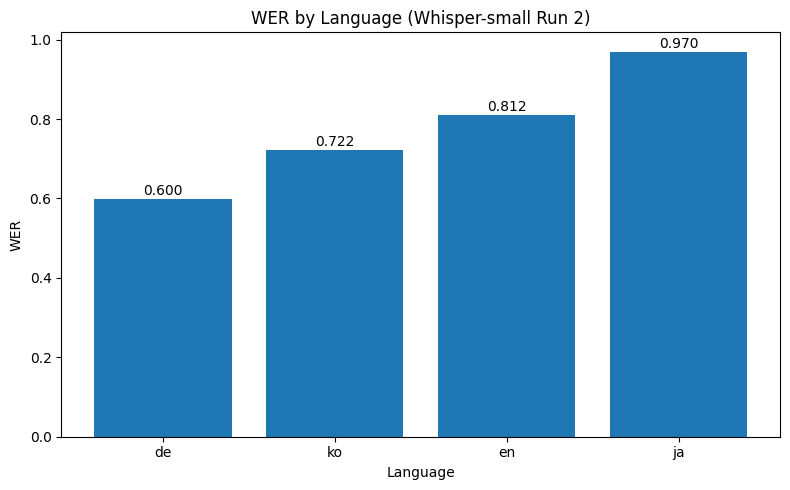

In [10]:
import matplotlib.pyplot as plt
import numpy as np

print("\n📊 WER 결과 (낮을수록 정확)")
for lang, score in sorted(lang_wer_results.items(), key=lambda x: x[1]):
    print(f"{lang.upper()} : {score:.4f}")

langs_sorted = [x[0] for x in sorted(lang_wer_results.items(), key=lambda x: x[1])]
scores_sorted = [x[1] for x in sorted(lang_wer_results.items(), key=lambda x: x[1])]

plt.figure(figsize=(8,5))
plt.bar(langs_sorted, scores_sorted)
plt.title("WER by Language (Whisper-small Run 2)")
plt.xlabel("Language")
plt.ylabel("WER")

for i, v in enumerate(scores_sorted):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.savefig("wer_small_run2.png")
plt.show()

<data 100개 증량 + 하이퍼파라미터 튜닝>
- KO : 0.9497 -> 0.7224
- DE : 1.1159 -> 0.5995
- JA : 1.5100 -> 0.9700
- EN : 1.8555 -> 0.8115